In [1]:
# -appliquer sclaer sur modeles à optimiser (randomforest...
# -pipeline
# -installer un environnement

In [2]:
""" depuis terminal : 
python -m venv oc7_venv
source oc7_venv/bin/activate
pip install ipykernel
python -m ipykernel install --user --name=oc7_venv --display-name "OC7 Environment"
"""


"""
supression de kernel
jupyter kernelspec list
jupyter kernelspec remove [nom_du_kernel]
deactivate
rm -rf [chemin_vers_oc7_venv]
"""

"""
lister les dependencies installées
pip list
les enregistrer dans un fichier
pip freeze > requirements.txt

"""

"""/Users/laureagrech/oc7_venv/bin/python"""

'/Users/laureagrech/oc7_venv/bin/python'

In [3]:
#pip install dill numpy pandas scikit-learn hyperopt xgboost lightgbm imbalanced-learn lime shap evidently matplotlib seaborn

In [4]:
%%capture captured_output
!pip show pandas

# Set up

Python librairies imports :

In [5]:
%%capture captured_output
!pip install jupyter_ai

In [6]:
#%%capture captured_output
#!pip install jupyter_ai_magics

In [7]:
%%capture captured_output
!pip install hyperopt
!pip install xgboost
!pip install lime
!pip install shap
!pip install evidently

In [8]:
!pip install dill

In [9]:
# File system management
import os
import pickle
import dill

from collections import Counter

# Data manipulation
import numpy as np
import pandas as pd

# Scikit-learn
from sklearn.model_selection import cross_val_predict, cross_validate, cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler 

# Hyperparameters optimisation
from hyperopt import tpe, hp, fmin, space_eval, STATUS_OK, Trials, SparkTrials 
from hyperopt.pyll.base import scope

# XGBoost
import xgboost as xgb

# LightGBM
import lightgbm as ltb

# Balancing data
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Interpratability
from lime import lime_tabular
import shap

# Data drift
from evidently.report import Report
from evidently.metric_preset import DataDriftPreset

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme(palette="Set1")

/Users/laureagrech/oc7_venv/lib/python3.12/site-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/Users/laureagrech/oc7_venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Define work location :

Load data :

In [10]:
pwd

'/Users/laureagrech/Desktop/OC7/notebooks'

# import data 

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Load data
data = pd.read_csv("../data/processed/train_feature_engineering_sample.csv")
data_test = pd.read_csv("../data/processed/test_feature_engineering_sample.csv")

In [3]:
data.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0    104589.0     0.0                   0            0             1   
1    223615.0     0.0                   0            1             0   
2    315031.0     0.0                   0            1             0   
3    130862.0     0.0                   0            0             1   
4    140528.0     0.0                   0            1             1   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                0             0          135000.0    133659.0      12388.5   
1                0             2          110250.0    472500.0      44991.0   
2                1             2          117000.0    675000.0      28728.0   
3                0             0          135000.0    592560.0      32274.0   
4                0             1          180000.0    715095.0      48109.5   

   ...  CC_NAME_CONTRACT_STATUS_Signed_MIN  \
0  ...                                 NaN   
1  ...                               False   
2  ...                                 NaN   
3  ...                                 NaN   
4  ...                                 NaN   

   CC_NAME_CONTRACT_STATUS_Signed_MAX  CC_NAME_CONTRACT_STATUS_Signed_MEAN  \
0                                 NaN                                  NaN   
1                                True                               0.0125   
2                                 NaN                                  NaN   
3                                 NaN                                  NaN   
4                                 NaN                                  NaN   

   CC_NAME_CONTRACT_STATUS_Signed_SUM  CC_NAME_CONTRACT_STATUS_Signed_VAR  \
0                                 NaN                                 NaN   
1                                 1.0                              0.0125   
2                                 NaN                                 NaN   
3                                 NaN                                 NaN   
4                                 NaN                                 NaN   

   CC_NAME_CONTRACT_STATUS_nan_MIN  CC_NAME_CONTRACT_STATUS_nan_MAX  \
0                              NaN                              NaN   
1                            False                            False   
2                              NaN                              NaN   
3                              NaN                              NaN   
4                              NaN                              NaN   

   CC_NAME_CONTRACT_STATUS_nan_MEAN  CC_NAME_CONTRACT_STATUS_nan_SUM  \
0                               NaN                              NaN   
1                               0.0                              0.0   
2                               NaN                              NaN   
3                               NaN                              NaN   
4                               NaN                              NaN   

   CC_NAME_CONTRACT_STATUS_nan_VAR  
0                              NaN  
1                              0.0  
2                              NaN  
3                              NaN  
4                              NaN  

[5 rows x 608 columns]

In [4]:
data_test.head()

SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0    218796.0                   0            1             0                0   
1    202006.0                   0            1             0                0   
2    123688.0                   0            1             0                0   
3    389440.0                   0            1             0                0   
4    166255.0                   0            1             0                0   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0             0          103500.0    280170.0      29547.0   
1             1          202500.0    383787.0      33070.5   
2             1          157500.0    440784.0      34956.0   
3             0           90000.0    189000.0      12757.5   
4             0          135000.0    450000.0      19197.0   

   REGION_POPULATION_RELATIVE  ...  CC_NAME_CONTRACT_STATUS_Signed_MIN  \
0                    0.018029  ...                                 NaN   
1                    0.018850  ...                                 NaN   
2                    0.002134  ...                                 NaN   
3                    0.015221  ...                               False   
4                    0.028663  ...                                 NaN   

   CC_NAME_CONTRACT_STATUS_Signed_MAX  CC_NAME_CONTRACT_STATUS_Signed_MEAN  \
0                                 NaN                                  NaN   
1                                 NaN                                  NaN   
2                                 NaN                                  NaN   
3                               False                                  0.0   
4                                 NaN                                  NaN   

   CC_NAME_CONTRACT_STATUS_Signed_SUM  CC_NAME_CONTRACT_STATUS_Signed_VAR  \
0                                 NaN                                 NaN   
1                                 NaN                                 NaN   
2                                 NaN                                 NaN   
3                                 0.0                                 0.0   
4                                 NaN                                 NaN   

   CC_NAME_CONTRACT_STATUS_nan_MIN  CC_NAME_CONTRACT_STATUS_nan_MAX  \
0                              NaN                              NaN   
1                              NaN                              NaN   
2                              NaN                              NaN   
3                            False                            False   
4                              NaN                              NaN   

   CC_NAME_CONTRACT_STATUS_nan_MEAN  CC_NAME_CONTRACT_STATUS_nan_SUM  \
0                               NaN                              NaN   
1                               NaN                              NaN   
2                               NaN                              NaN   
3                               0.0                              0.0   
4                               NaN                              NaN   

   CC_NAME_CONTRACT_STATUS_nan_VAR  
0                              NaN  
1                              NaN  
2                              NaN  
3                              0.0  
4                              NaN  

[5 rows x 607 columns]

In [6]:
for c in data_test.columns:
    print(c)
    

SK_ID_CURR
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APARTMENTS_MODE
BASEMENTAREA_MODE
YEARS_BEGINEXPLUATATION_MODE
COMMONAREA_MODE
ELEVATORS_MODE
ENTRANCES_MODE
LANDAREA_MODE
LIVINGAPARTMENTS_MODE
LIVINGAREA_MODE
NONLIVINGAPARTMENT

# Functions

In [14]:
from sklearn.metrics import roc_auc_score, roc_curve, fbeta_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [15]:
# Fonction pour afficher la matrice de confusion
def display_confusion_matrix(y_true, y_pred, model_name):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    print(f"Matrice de confusion pour {model_name} :")
    print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")
    print("\n")

In [16]:
# Fonction améliorée pour calculer et tracer la courbe ROC avec le seuil optimal
# La fonction "compute_roc_curve" est utilisée pour évaluer et visualiser la performance d'un modèle de classification binaire.
# 
# Dans le contexte de ce projet, elle permet de tracer la courbe ROC, qui montre la capacité du modèle à distinguer entre les classes 
# en calculant les taux de faux positifs (FPR) et de vrais positifs (TPR) à plusieurs seuils de classification.
# 
# L'aire sous la courbe ROC (AUC) est aussi calculée, ce qui fournit une mesure quantifiable de la performance du modèle : 
# plus l'AUC est proche de 1, meilleure est la performance du modèle.
# 
# Un aspect avancé de cette fonction est la possibilité de trouver et afficher le seuil optimal, 
# celui où la somme des distances entre le taux de vrais positifs et de faux positifs est minimale. 
# Cette fonctionnalité est activée en réglant "disp_best_th" à True.
# 
# En résumé, cette fonction aide à comprendre et à illustrer comment un modèle travaille sur un ensemble de données, 
# ce qui est essentiel dans l'évaluation pour un meilleur choix de modèle ou de seuil de classification pour le projet.

In [17]:
def compute_roc_curve(y_test, y_pred_proba, model_name="Model", disp_best_th=False):
    # Calcule les métriques nécessaires pour la courbe ROC
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)  # Calcul des taux de faux positifs, vrais positifs et des seuils
    auc = roc_auc_score(y_test, y_pred_proba)  # Calcul de l'AUC (Area Under Curve)
    
    # Créer une nouvelle figure pour tracer la courbe
    plt.figure()
    plt.title(model_name + ": ROC curve")  # Ajouter un titre à la courbe ROC

    # Tracer la ligne de référence y=x (baseline)
    sns.lineplot(x=[0, 1], y=[0, 1], linestyle='--')  # Ligne en pointillés comme baseline

    # Trace la courbe ROC réelle
    sns.lineplot(x=fpr, y=tpr, legend='brief', label="AUC = {:.3f}".format((auc)))  # Ajouter la légende avec l'AUC

    if disp_best_th:
        # Calcule le meilleur seuil basé sur la distance minimale à (0,1)
        o_tpr = tpr[np.argmin(np.abs(fpr + tpr - 1))]  # Taux de vrais positifs optimal
        o_fpr = fpr[np.argmin(np.abs(fpr + tpr - 1))]  # Taux de faux positifs optimal
        o_threshold = thresholds[np.argmin(np.abs(fpr + tpr - 1))]  # Seuil optimal

        # Affiche le point du meilleur seuil sur la courbe ROC
        sns.scatterplot(x=[o_fpr], y=[o_tpr], legend='brief', label="Best threshold = {:.3f}".format(o_threshold))  # Ajouter un point pour le meilleur seuil

    plt.ylabel('True Positive Rate')  # Étiqueter l'axe des ordonnées
    plt.xlabel('False Positive Rate')  # Étiqueter l'axe des abscisses
    plt.legend(loc=4)  # Placer la légende
    plt.show()  # Affiche le tracé

    # Retourne le score AUC
    return auc  # Renvoie le score AUC pour évaluer la performance du modèle

In [18]:
# Fonction pour calculer les résultats de classification
# La fonction `compute_classification_results` a pour objectif d'évaluer un modèle de classification binaire.
# 
# Elle est utile dans le cadre de ce projet car elle compile plusieurs métriques de performance clés qui 
# permettent d'analyser la qualité du modèle sur les données de test.
# 
# Voici un aperçu des actions réalisées par la fonction :
# 
# 1. **Prédictions de Probabilité :** Elle calcule la probabilité que chaque instance appartienne à la classe positive 
#    (classe 1) à l'aide de la méthode `predict_proba`. Cette étape est cruciale pour des mesures telles que la courbe ROC.
# 
# 2. **Prédictions de Classes :** Elle produit les étiquettes de classe en utilisant la méthode `predict`.
# 
# 3. **Matrice de Confusion :** La fonction affiche une matrice de confusion pour visualiser les résultats, 
#    en montrant les vrais positifs (TP), faux positifs (FP), vrais négatifs (TN) et faux négatifs (FN).
# 
# 4. **Courbe ROC et AUC :** Elle trace la courbe ROC et calcule l'aire sous la courbe (AUC), ce qui donne un indicateur 
#    de la capacité du modèle à classer correctement les instances entre les deux classes.
# 
# 5. **Rapport de Classification :** Un rapport de classification est généré pour fournir des mesures telles que 
#    la précision, le rappel et le score F1 pour chaque classe.
# 
# 6. **F-beta Score :** Elle calcule le score F-beta, une généralisation du score F1 qui permet de pondérer 
#    l'importance relative de la précision et du rappel avec le paramètre beta.
# 
# L'analyse des résultats retournés par cette fonction aide à évaluer les forces et faiblesses du modèle, 
# en permettant des décisions éclairées quant à l'amélioration des performances du modèle dans ce projet. 
# Elle est particulièrement utile pour comparer différents modèles de classification et sélectionner le plus approprié.

In [19]:
def compute_classification_results(model, model_name, x_test, y_test, beta=2, disp_best_th=False):
    
    # Prédit la probabilité de la classe 1 (défaut de remboursement)
    y_pred_proba = model.predict_proba(x_test)[:,1]

    # Prédit les classes
    y_pred = model.predict(x_test)

    # Affiche la matrice de confusion
    display_confusion_matrix(y_test, y_pred, model_name=model_name)

    # Trace la courbe ROC et calculer le score AUC
    auc_score = compute_roc_curve(y_test, y_pred_proba, model_name=model_name, disp_best_th=disp_best_th)

    # Calcule le rapport de classification
    classification_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
    display(classification_report)

    # Calcule le F-beta score
    fbeta = fbeta_score(y_test, y_pred, beta=beta)
    print(f"F-beta score (beta={beta}) =", fbeta)

    return fbeta, auc_score, classification_report

In [20]:
# Return the best model from hyperopt trials
def trials_best_model(trials):
    valid_trial_list = [trial for trial in trials
                            if STATUS_OK == trial['result']['status']]
    losses = [float(trial['result']['loss']) for trial in valid_trial_list]
    min_loss_idx = np.argmin(losses)
    best_trial_obj = valid_trial_list[min_loss_idx]
    print("Best result :", best_trial_obj['result']['loss'])
    return best_trial_obj['result']['model']

# MLFlow

MLflow est utilisé pour suivre et enregistrer les résultats d'entraînement de modèles de machine learning. 

MLflow est un outil de gestion du cycle de vie des modèles, qui permet de logger (enregistrer) des hyperparamètres, des métriques,

des artefacts (comme les modèles eux-mêmes) et
d'autres informations pertinentes pour le suivi des expériences de machine learning.

Set up of MLFlow tracking.

In [21]:
%%capture captured_output
!pip install mlflow

La fonction log_mlflow est conçue pour enregistrer les paramètres, les métriques, et le modèle dans l'environnement MLflow.

In [22]:
import mlflow

# Définir l'emplacement pour les logs MLflow (par exemple, un dossier spécifique)
mlflow.set_tracking_uri("../mlruns")

In [23]:
pwd


'/Users/laureagrech/Desktop/OC7/notebooks'

In [24]:
import mlflow

# Nom de l'expérience
experiment_name = 'credit_scoring'

# Vérifie si l'expérience existe déjà
mlflow.set_experiment(experiment_name)

# Commence une nouvelle run dans cette expérience
with mlflow.start_run() as run:
    # Log des paramètres ou métriques ici
    mlflow.log_param("param1", 5)
    mlflow.log_metric("metric1", 0.89)

# Fin du run automatiquement grâce au 'with'


In [25]:
# Function to log model to mlflow
def log_mlflow(model, name, custom_score, n_estimator=None, max_depth=None, auc_score=None, f1_score=None, acc_score=None,
               train_class_0=None, train_class_1=None):

    # Track params and metrics 
    with mlflow.start_run():
        # Set run name
        mlflow.set_tag("mlflow.runName", name)

        # Set parameters
        mlflow.log_param("n_estimators", n_estimator)
        mlflow.log_param("max_depth", max_depth)
        mlflow.log_param("train_class_0", train_class_0)
        mlflow.log_param("train_class_1", train_class_1)

        # Set metrics
        mlflow.log_metric("Custom score", custom_score)
        mlflow.log_metric("AUC", auc_score)
        mlflow.log_metric("F1", f1_score)
        mlflow.log_metric("Accuracy", acc_score)

        # Save model to artifacts
        mlflow.sklearn.log_model(model, name)

    mlflow.end_run()

#mlflow ui


In [26]:


# Vérifier que l'expérimentation est bien créée
print("Expérimentation définie :", mlflow.get_experiment_by_name("credit_scoring"))


Expérimentation définie : <Experiment: artifact_location='/Users/laureagrech/Desktop/OC7/notebooks/../mlruns/379845844456180481', creation_time=1729106380864, experiment_id='379845844456180481', last_update_time=1729106380864, lifecycle_stage='active', name='credit_scoring', tags={}>


# Data preparation

In [27]:
"""# Define target and features
TARGET = 'TARGET'
target = data[TARGET].to_numpy()
features = data.drop(columns=TARGET).to_numpy()
features_names = data.drop(columns=TARGET).columns.to_list()

# Define training set size
TRAIN_SIZE = 0.8

# Define random state
RANDOM_STATE = 42"""

"# Define target and features\nTARGET = 'TARGET'\ntarget = data[TARGET].to_numpy()\nfeatures = data.drop(columns=TARGET).to_numpy()\nfeatures_names = data.drop(columns=TARGET).columns.to_list()\n\n# Define training set size\nTRAIN_SIZE = 0.8\n\n# Define random state\nRANDOM_STATE = 42"

## Missing values

In [28]:
"""# Check missing values
nan_values = data.isna().sum().sum()
print("Missing values = {} ({:.2%})".format(nan_values, nan_values/data.size))"""

'# Check missing values\nnan_values = data.isna().sum().sum()\nprint("Missing values = {} ({:.2%})".format(nan_values, nan_values/data.size))'

I fill the missing values with a simple imputer.

In [29]:
"""# Create imputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit to data
imp_mean.fit(features)

# Transform data
features_fill = imp_mean.transform(features)"""

"# Create imputer\nimp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')\n\n# Fit to data\nimp_mean.fit(features)\n\n# Transform data\nfeatures_fill = imp_mean.transform(features)"

## Split data

I split the data into training and testing sets.

In [30]:
"""# Split dataset (filled)
x_train, x_test, y_train, y_test = train_test_split(features_fill, target, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)"""

'# Split dataset (filled)\nx_train, x_test, y_train, y_test = train_test_split(features_fill, target, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)'

In [31]:
"""# Define stratifiedKfold
strat_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)"""

'# Define stratifiedKfold\nstrat_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)'

## Balance data

In [32]:
"""y_train_counter = Counter(y_train)
print("Training target statistics:", y_train_counter)
print("Testing target statistics:", Counter(y_test))

# Print ratio
print("Ratio is 1:{:.0f}".format(y_train_counter[0] / y_train_counter[1]))"""

'y_train_counter = Counter(y_train)\nprint("Training target statistics:", y_train_counter)\nprint("Testing target statistics:", Counter(y_test))\n\n# Print ratio\nprint("Ratio is 1:{:.0f}".format(y_train_counter[0] / y_train_counter[1]))'

I will define a pipeline that first transforms the training dataset with SMOTE then fits the model.

In [33]:
"""# Define oversampling and undersampling
oversampling = SMOTE(sampling_strategy=0.5) # oversample to 1:2 ratio 
undersampling = RandomUnderSampler(sampling_strategy=1) # undersample to 1:1 ratio

# Define pipeline
steps = [('oversampling', oversampling), ('undersampling', undersampling)]
# steps = [('over', over)]

pipeline = Pipeline(steps=steps)

# Transform the dataset
x_res, y_res = pipeline.fit_resample(x_train, y_train)
#fit_resample prend les données dentraînement (x_train, y_train) comme entrée.
#Il applique d'abord SMOTE pour suréchantillonner la classe minoritaire.
#Ensuite, il applique RandomUnderSampler pour réduire le nombre d'exemples de la classe majoritaire."""
"""
print("Training target statistics:", Counter(y_res)) # Statistiques après rééchantillonnage
print("Testing target statistics:", Counter(y_test)) # Statistiques du jeu de test"""

'\nprint("Training target statistics:", Counter(y_res)) # Statistiques après rééchantillonnage\nprint("Testing target statistics:", Counter(y_test)) # Statistiques du jeu de test'

In [34]:
"""print("Training target statistics:", Counter(y_res)) 
print("Testing target statistics:", Counter(y_test)) # Statistiques du jeu de test"""


'print("Training target statistics:", Counter(y_res)) \nprint("Testing target statistics:", Counter(y_test)) # Statistiques du jeu de test'

In [35]:
"""# Display barplot of distribution to see Smote impact on data
class_distr_df = pd.DataFrame({'training set': ['unbalanced', 'unbalanced', 'balanced', 'balanced'],
                               'target': ['Class 0', 'Class 1', 'Class 0', 'Class 1'],
                               'count': [y_train_counter[0], y_train_counter[1], Counter(y_res)[0], Counter(y_res)[1]]})

# Display barplot
sns.barplot(class_distr_df, x='training set', y='count', hue='target')
plt.title("Target distribution")
plt.show()"""

'# Display barplot of distribution to see Smote impact on data\nclass_distr_df = pd.DataFrame({\'training set\': [\'unbalanced\', \'unbalanced\', \'balanced\', \'balanced\'],\n                               \'target\': [\'Class 0\', \'Class 1\', \'Class 0\', \'Class 1\'],\n                               \'count\': [y_train_counter[0], y_train_counter[1], Counter(y_res)[0], Counter(y_res)[1]]})\n\n# Display barplot\nsns.barplot(class_distr_df, x=\'training set\', y=\'count\', hue=\'target\')\nplt.title("Target distribution")\nplt.show()'

## Custom loss function

Rule : cost FN (dont repay - predicted as repay) = 10 cost FP (repay - predicted as dont repay)

Le make scorer fonctionne bien pour calculer un score métier en se basant sur la matrice de confusion, avec une pénalisation spécifique pour les faux négatifs.
On adapte le paramètre beta pour le F-beta score dans make_scorer. Le F-beta score permet de donner plus ou moins d'importance au Recall (sensibilité) ou à la Précision, selon la valeur de beta.

### avec beta score

In [36]:
from sklearn.metrics import fbeta_score

# Exemple avec beta = 2 pour accorder plus d'importance au Recall
# Fonction pour calculer le F-beta score avec un beta ajusté
def fbeta_scorer(beta=2):
    return make_scorer(fbeta_score, beta=beta)

In [37]:
mlflow.end_run()

In [38]:
import os
import time
import pandas as pd
import joblib
import mlflow
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, fbeta_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.dummy import DummyClassifier

def train_and_log_model(model, model_name, data, target_name='TARGET', train_size=0.8, random_state=42, betas=[0.5, 1, 2, 2.5]):
    start_time = time.time()
    target = data[target_name].to_numpy()
    features = data.drop(columns=target_name).to_numpy()

    x_train, x_test, y_train, y_test = train_test_split(features, target, train_size=train_size, random_state=random_state)

    preprocess_pipeline = ImbPipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('oversampling', SMOTE(sampling_strategy=0.5, random_state=random_state)),
        ('undersampling', RandomUnderSampler(sampling_strategy=1, random_state=random_state)),
        ('model', model)
    ])

    results = []
    for beta in betas:
        fbeta_scorer = make_scorer(fbeta_score, beta=beta)
        with mlflow.start_run(run_name=f"{model_name}_beta_{beta}"):
            preprocess_pipeline.fit(x_train, y_train)
            y_pred = preprocess_pipeline.predict(x_test)
            y_pred_proba = preprocess_pipeline.predict_proba(x_test)[:, 1]

            accuracy = accuracy_score(y_test, y_pred)
            auc_score = roc_auc_score(y_test, y_pred_proba)
            fbeta = fbeta_score(y_test, y_pred, beta=beta)
            clf_report = classification_report(y_test, y_pred, zero_division=0, output_dict=True)

            mlflow.log_params({"model_type": model_name, "beta": beta})
            mlflow.log_metrics({"accuracy": accuracy, "AUC": auc_score, "F-beta": fbeta})

            results.append({
                'Beta': beta,
                'AUC': auc_score,
                'Accuracy': accuracy,
                'F-beta': fbeta,
                'Report': clf_report
            })

            model_path = f'../models/{model_name}_beta_{beta}_pipeline.pkl'
            joblib.dump(preprocess_pipeline, model_path)
            mlflow.log_artifact(model_path)

    duration = time.time() - start_time
    mlflow.log_metric("training_duration_seconds", duration)

    return beta, auc_score, accuracy, fbeta, clf_report, duration


In [39]:
mlflow.end_run()

In [40]:
# Example usage
model = DummyClassifier(strategy='most_frequent', random_state=42)
model_name = 'DummyModel'

beta, auc_score, accuracy, fbeta, clf_report, duration = train_and_log_model(model, model_name, data, betas=[0.5, 1, 2, 2.5])

In [41]:
mlflow.end_run()

In [42]:
model = LogisticRegression(solver='liblinear', random_state=42)
model_name = 'LogisticRegression'
beta, auc_score, accuracy, fbeta, clf_report, duration = train_and_log_model(model, model_name, data, betas=[0.5, 1, 2, 2.5])

In [43]:
display(clf_report)

{'0.0': {'precision': 0.952,
  'recall': 0.7158527954706299,
  'f1-score': 0.8172086447182387,
  'support': 5652.0},
 '1.0': {'precision': 0.1551814834297738,
  'recall': 0.591182364729459,
  'f1-score': 0.24583333333333332,
  'support': 499.0},
 'accuracy': 0.7057389042432125,
 'macro avg': {'precision': 0.5535907417148869,
  'recall': 0.6535175801000443,
  'f1-score': 0.531520989025786,
  'support': 6151.0},
 'weighted avg': {'precision': 0.887358081650375,
  'recall': 0.7057389042432125,
  'f1-score': 0.770855810970707,
  'support': 6151.0}}

### avec loss function

In [44]:
#ajouter ancienne loss function

In [45]:
"""Fonction pour calculer le score personnalisé basé sur la matrice de confusion et F-beta¶
def cost_score_function(y_true, y_pred, y_pred_proba, beta=2): # Matrice de confusion tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

# Custom profit score basé sur la règle métier
cost_score = (tp * 0) + (tn * 0) - (fp * 10) - (fn * 100)
cost_score = (- (fp * 10) - (fn * 100))/(-fp-fn))# normaliser pour avoir sortie positive entre 0 et 1

# Calcul du F-beta score avec le beta ajusté
#fbeta = fbeta_score(y_true, y_pred, beta=beta)

# Combiner les deux scores 
#combined_score = profit_score + fbeta * 100  # Mettre plus de poids sur F-beta si nécessaire
return combined_score
#return combined_score"""

'Fonction pour calculer le score personnalisé basé sur la matrice de confusion et F-beta¶\ndef cost_score_function(y_true, y_pred, y_pred_proba, beta=2): # Matrice de confusion tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()\n\n# Custom profit score basé sur la règle métier\ncost_score = (tp * 0) + (tn * 0) - (fp * 10) - (fn * 100)\ncost_score = (- (fp * 10) - (fn * 100))/(-fp-fn))# normaliser pour avoir sortie positive entre 0 et 1\n\n# Calcul du F-beta score avec le beta ajusté\n#fbeta = fbeta_score(y_true, y_pred, beta=beta)\n\n# Combiner les deux scores \n#combined_score = profit_score + fbeta * 100  # Mettre plus de poids sur F-beta si nécessaire\nreturn combined_score\n#return combined_score'

On utilisera uniquement le F-beta score pour optimiser le modèle, en ayant en tête l' objectif principal de minimisation des faux négatifs (FN).

Le F-beta score est idéal pour cette tâche, car on peut ajuster le paramètre beta pour donner plus de poids au recall (rappel), ce qui est crucial pour réduire les faux négatifs. 
Un faux négatif se produit lorsqu'une personne qui ne peut pas rembourser le crédit est identifiée à tort comme pouvant le faire. 

En augmentant le recall, on maximise la détection des vrais cas de clients qui ne peuvent pas rembourser, ce qui réduit les faux négatifs

La matrice de confusion est un tableau qui décompose les prédictions d'un modèle de classification en quatre catégories :

TN (True Negatives True Target=0) : Cas où le modèle a correctement prédit la classe négative (un client remboursera son crédit et le modèle l'a bien prédit).

FP (False Positives Faux Target =1) : Cas où le modèle a prédit la classe positive, mais c'était en réalité négatif (un client est prédit comme ne remboursant pas alors qu'il rembourse en réalité).

FN (False Negatives Faux Target =0) : Cas où le modèle a prédit la classe négative, mais c'était en réalité positif (un client est prédit comme remboursant, mais il ne rembourse pas en réalité).

TP (True Positives Vrai Target =1) : Cas où le modèle a correctement prédit la classe positive (un client ne remboursera pas et le modèle l'a bien prédit).

# Classification

Les métriques de précision, rappel, F1-score, support, et un score métier personnalisé sont couramment utilisées pour évaluer la performance des modèles de classification en machine learning, spécialement dans les contextes où les décisions ont des conséquences financières ou d'autres impacts importants.

1. Précision (Precision)
La précision mesure la justesse des prédictions positives faites par le modèle. Elle est définie comme le ratio des vrais positifs (TP) par rapport à la somme des vrais positifs et des faux positifs (FP):


Interprétation : Une précision élevée indique qu'une grande proportion des identifications positives du modèle sont correctes.

2. Rappel (Recall) ou Sensibilité
Le rappel mesure la capacité du modèle à détecter tous les cas positifs réels. Il est défini comme le ratio des vrais positifs par rapport à la somme des vrais positifs et des faux négatifs (FN):

Rappel
: Un rappel élevé signifie que le modèle est capable de détecter une grande partie des cas positifs réels. C'est crucial dans les situations où ne pas détecter les positifs (comme les maladies ou les fraudes) peut avoir de graves conséquences.

3. F1-Score
Le F1-score est la moyenne harmonique de la précision et du rappel. Il combine les deux métriques en une seule, ce qui est particulièrement utile lorsque vous avez besoin d'un équilibre entre la précision et le rappel:
Interprétation : Le F1-score est particulièrement utile quand les coûts des faux positifs et faux négatifs sont très équilibrés, ou lorsque les distributions des classes sont déséquilibrées.

4. Support
Le support est le nombre de cas réels pour chaque classe dans les données testées. Pour chaque classe, il indique combien d'exemples de cette classe existent dans les données.

Interprétation : Le support n'influence pas directement la performance du modèle mais donne un contexte sur la significativité des métriques de performance comme le rappel et la précision.

5. Score Métier
Un score métier est une métrique personnalisée qui évalue la performance du modèle selon des critères spécifiquement importants pour l'entreprise ou l'application. Il peut intégrer des coûts ou des bénéfices associés aux différentes prédictions du modèle (TP, FP, TN, FN). Par exemple :

Interprétation : Cette métrique est utilisée pour maximiser le rendement économique du modèle ou pour minimiser les risques spécifiques. Elle aide à prendre des décisions stratégiques sur le déploiement du modèle en production en alignant les objectifs du modèle avec les objectifs financiers ou opérationnels de l'organisation.
Ensemble, ces métriques fournissent une vue complète de la performance d'un modèle de classification, aidant les développeurs à comprendre ses forces et ses faiblesses et à faire des ajustements pour améliorer son efficacité dans des contextes pratiques.

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Fonction pour afficher la matrice de confusion
def display_confusion_matrix(y_true, y_pred, model_name):
    # Calcul de la matrice de confusion
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Affichage texte explicatif
    print(f"Matrice de confusion pour {model_name} :")
    print(f"TN (True Negatives): {tn}")
    print(f"FP (False Positives): {fp}")
    print(f"FN (False Negatives): {fn}")
    print(f"TP (True Positives): {tp}")

    # Création d'une matrice annotée avec les labels et les valeurs correspondantes
    cm_annot = [[f'TN\n{tn}', f'FP\n{fp}'],
                [f'FN\n{fn}', f'TP\n{tp}']]

    # Affichage graphique avec sns.heatmap
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=cm_annot, fmt='', cmap="Blues", cbar=False, 
                xticklabels=["Classe 0 (Prédit)", "Classe 1 (Prédit)"], 
                yticklabels=["Classe 0 (Réel)", "Classe 1 (Réel)"])
    
    plt.title(f'Matrice de confusion - {model_name}', fontsize=14)
    plt.ylabel('Classe réelle', fontsize=12)
    plt.xlabel('Classe prédite', fontsize=12)
    
    plt.tight_layout()
    plt.show()



In [47]:
# Fonction pour calculer et tracer la courbe ROC
def compute_roc_curve(y_true, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    auc_score = roc_auc_score(y_true, y_pred_proba)
    
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonale
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taux de Faux Positifs')
    plt.ylabel('Taux de Vrais Positifs')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

    return auc_score

In [48]:
# Fonction pour afficher la matrice de confusion, la courbe ROC, et le F-beta score
def compute_classification_results(model, model_name, x_test, y_test, beta=2):
    # Prédire la probabilité de la classe 1 (défaut de remboursement)
    y_pred_proba = model.predict_proba(x_test)[:, 1]

    # Prédire les classes
    y_pred = model.predict(x_test)

    # Afficher la matrice de confusion
    display_confusion_matrix(y_test, y_pred, model_name=model_name)

    # Tracer la courbe ROC et calculer le score AUC
    auc_score = compute_roc_curve(y_test, y_pred_proba, model_name=model_name)

    # Calculer le rapport de classification
    classification_report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
    display(classification_report_df)

    # Calculer le F-beta score
    fbeta = fbeta_score(y_test, y_pred, beta=beta)
    print(f"F-beta score (beta={beta}) =", fbeta)

    # Retourner les résultats
    return fbeta, auc_score, classification_report_df


In [49]:
# Fonction pour calculer et tracer la courbe ROC
def compute_roc_curve(y_true, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    auc_score = roc_auc_score(y_true, y_pred_proba)
    
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonale
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taux de Faux Positifs')
    plt.ylabel('Taux de Vrais Positifs')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

    return auc_score

# Models pipeline générique (comparaison des différents modèles)

In [50]:
"""
Utilisation d' une pipeline de prétraitement pour les étapes qui peuvent être appliquées de manière
uniforme aux ensembles d'entraînement et de test (comme l'imputation 
et la normalisation). 

Application du rééquilibrage uniquement aux données d'entraînement après le prétraitement.
"""

"\nUtilisation d' une pipeline de prétraitement pour les étapes qui peuvent être appliquées de manière\nuniforme aux ensembles d'entraînement et de test (comme l'imputation \net la normalisation). \n\nApplication du rééquilibrage uniquement aux données d'entraînement après le prétraitement.\n"

In [51]:
"""
Pour s'assurer que le prétraitement est appliqué à de nouvelles données exactement 
de la même manière qu'il l'a été sur les données d'entraînement, vous devriez structurer
votre pipeline pour inclure les étapes de prétraitement ainsi que le modèle, en veillant
à ne pas appliquer les techniques de rééquilibrage aux nouvelles données.
"""

"\nPour s'assurer que le prétraitement est appliqué à de nouvelles données exactement \nde la même manière qu'il l'a été sur les données d'entraînement, vous devriez structurer\nvotre pipeline pour inclure les étapes de prétraitement ainsi que le modèle, en veillant\nà ne pas appliquer les techniques de rééquilibrage aux nouvelles données.\n"

In [52]:
"""
import os
import time
import joblib
import mlflow
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, make_scorer, fbeta_score, classification_report, roc_auc_score
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

def fbeta_scorer(beta=2):
    from sklearn.metrics import make_scorer, fbeta_score
    return make_scorer(fbeta_score, beta=beta)

def train_and_log_model(model, model_name, data, target_name='TARGET', train_size=0.8, random_state=42, beta=2):
    start_time = time.time()

    # Préparation des données
    target = data[target_name].to_numpy()
    features = data.drop(columns=[target_name]).to_numpy()

    # Imputation des valeurs manquantes et normalisation
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    scaler = StandardScaler()
    features_fill = imp_mean.fit_transform(features)
    features_fill = scaler.fit_transform(features_fill)

    # Diviser les données en ensembles de train et de test
    x_train, x_test, y_train, y_test = train_test_split(features_fill, target, train_size=train_size, random_state=random_state)

    # Rééquilibrage et modélisation
    model_pipeline = ImbPipeline([
        ('oversampling', SMOTE(sampling_strategy=0.5, random_state=random_state)),
        ('undersampling', RandomUnderSampler(sampling_strategy=1, random_state=random_state)),
        ('model', model)
    ])

    # Entraînement du modèle
    model_pipeline.fit(x_train, y_train)

    # Prédiction et évaluation
    y_pred = model_pipeline.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    fbeta = fbeta_score(y_test, y_pred, beta=beta)
    auc_score = roc_auc_score(y_test, model_pipeline.predict_proba(x_test)[:, 1])
    clf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()

    # Sauvegarde du modèle
    model_path = f'../models/{model_name}_model.pkl'
    joblib.dump(model_pipeline, model_path)

    # Enregistrement avec MLflow
    with mlflow.start_run(run_name=f"{model_name}_with_pipeline"):
        mlflow.sklearn.log_model(model_pipeline, f"{model_name}_model")
        mlflow.log_params({"model_type": model_name, "oversampling_strategy": "0.5", "undersampling_strategy": "1"})
        mlflow.log_metrics({"accuracy": accuracy, "F-beta": fbeta, "AUC": auc_score})
        mlflow.log_artifact(model_path)

    # Calcul du temps d'exécution
    duration = time.time() - start_time

    return auc_score, accuracy, fbeta, clf_report, duration

# Exemple d'utilisation de la fonction
dummy_model = DummyClassifier(strategy='stratified', random_state=42)
dummy_name = 'DummyClassifier'
data = # Votre dataframe ici
dummy_auc, dummy_accuracy, dummy_fbeta, dummy_report, dummy_duration = train_and_log_model(dummy_model, dummy_name, data)
print(f"AUC: {dummy_auc}, Accuracy: {dummy_accuracy}, F-beta: {dummy_fbeta}, Duration: {dummy_duration}")
print(dummy_report)
"""

'\nimport os\nimport time\nimport joblib\nimport mlflow\nfrom sklearn.dummy import DummyClassifier\nfrom sklearn.model_selection import train_test_split, cross_val_score\nfrom sklearn.impute import SimpleImputer\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.metrics import accuracy_score, make_scorer, fbeta_score, classification_report, roc_auc_score\nfrom imblearn.pipeline import Pipeline as ImbPipeline\nfrom imblearn.over_sampling import SMOTE\nfrom imblearn.under_sampling import RandomUnderSampler\n\ndef fbeta_scorer(beta=2):\n    from sklearn.metrics import make_scorer, fbeta_score\n    return make_scorer(fbeta_score, beta=beta)\n\ndef train_and_log_model(model, model_name, data, target_name=\'TARGET\', train_size=0.8, random_state=42, beta=2):\n    start_time = time.time()\n\n    # Préparation des données\n    target = data[target_name].to_numpy()\n    features = data.drop(columns=[target_name]).to_numpy()\n\n    # Imputation des valeurs manquantes et normalisatio

In [53]:
"""
def predict_new_data(new_data, model_path):
    # Charger le modèle
    model = joblib.load(model_path)

    # Assumer que le prétraitement est requis
    # Si les étapes de prétraitement sont séparées, appliquez-les ici.
    new_data_prepared = model.named_steps['oversampling'].transform(new_data)  # Remplacez par les étapes appropriées si nécessaire

    # Faire des prédictions
    predictions = model.predict(new_data_prepared)
    return predictions

# Utilisation
new_data = # Votre nouveau dataframe ici
predictions = predict_new_data(new_data, '../models/DummyClassifier_model.pkl')
print(predictions)

"""

"\ndef predict_new_data(new_data, model_path):\n    # Charger le modèle\n    model = joblib.load(model_path)\n\n    # Assumer que le prétraitement est requis\n    # Si les étapes de prétraitement sont séparées, appliquez-les ici.\n    new_data_prepared = model.named_steps['oversampling'].transform(new_data)  # Remplacez par les étapes appropriées si nécessaire\n\n    # Faire des prédictions\n    predictions = model.predict(new_data_prepared)\n    return predictions\n\n# Utilisation\nnew_data = # Votre nouveau dataframe ici\npredictions = predict_new_data(new_data, '../models/DummyClassifier_model.pkl')\nprint(predictions)\n\n"

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, fbeta_score
import os
import joblib
import mlflow
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, fbeta_score
from mlflow.models.signature import infer_signature

# Fonction pour créer le fbeta_scorer
def fbeta_scorer(beta=2):
    return make_scorer(fbeta_score, beta=beta)

# Fonction pour la pipeline générique avec validation croisée
def train_and_log_model(model, model_name, data, target_name='TARGET', train_size=0.8, random_state=42, beta=2):
    # Suivi du temps de début
    start_time = time.time()

    # Préparation des données
    target = data[target_name].to_numpy()
    features = data.drop(columns=target_name).to_numpy()

    # Imputation des valeurs manquantes
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    features_fill = imp_mean.fit_transform(features)

    # Diviser les données en train/test
    x_train, x_test, y_train, y_test = train_test_split(features_fill, target, train_size=train_size, random_state=random_state)

    # Création de la pipeline générique
    pipeline = ImbPipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),  # Standardisation des données
        ('oversampling', SMOTE(sampling_strategy=0.5, random_state=42)),  # Suréchantillonnage
        ('undersampling', RandomUnderSampler(sampling_strategy=1, random_state=42)),  # Sous-échantillonnage
        ('model', model)  # Le modèle à ajuster
    ])

    # Suivi avec MLflow
    with mlflow.start_run(run_name=f"{model_name}_with_pipeline"):
        # Entraîner le modèle
        pipeline.fit(x_train, y_train)

        # Enregistrer le modèle dans MLflow
        mlflow.sklearn.log_model(pipeline, f"{model_name}_model")

        # Calculer des métriques de base
        accuracy = pipeline.score(x_test, y_test)
        mlflow.log_param("model_type", model_name)
        mlflow.log_param("oversampling_strategy", "0.5")
        mlflow.log_param("undersampling_strategy", "1")
        mlflow.log_metric("accuracy", accuracy)

        # Sauvegarder le pipeline dans un fichier .pkl
        os.makedirs('../models', exist_ok=True)
        joblib.dump(pipeline, f'../models/{model_name}_pipeline.pkl')
        print(f"Model {model_name} saved as models/{model_name}_pipeline.pkl")

        # Prédire les probabilités et les classes
        y_pred_proba = pipeline.predict_proba(x_test)[:, 1]
        y_pred = pipeline.predict(x_test)

        # Afficher la matrice de confusion et tracer la courbe ROC
        fbeta, auc_score, clf_report = compute_classification_results(pipeline, model_name, x_test, y_test, beta=beta)

        # Enregistrer d'autres métriques dans MLflow
        mlflow.log_metric("F-beta score", fbeta)
        mlflow.log_metric("AUC score", auc_score)
        mlflow.log_metric("precision", clf_report.loc['weighted avg', 'precision'])
        mlflow.log_metric("recall", clf_report.loc['weighted avg', 'recall'])
        mlflow.log_metric("f1_score", clf_report.loc['weighted avg', 'f1-score'])

        # Sauvegarder le rapport de classification dans un fichier CSV
        clf_report_filename = f'../models/{model_name}_classification_report.csv'
        clf_report.to_csv(clf_report_filename)
        mlflow.log_artifact(clf_report_filename)

        # Exécuter la validation croisée avec le F-beta scorer
        scorer = fbeta_scorer(beta=beta)
        cross_val_fbeta = cross_val_score(pipeline, features_fill, target, scoring=scorer, cv=5)
        mlflow.log_metric("mean_fbeta_cross_val", np.mean(cross_val_fbeta))
        print(f"Cross-validated F-beta score (beta={beta}): {np.mean(cross_val_fbeta)}")

        # Suivi du temps d'exécution
        end_time = time.time()
        duration = end_time - start_time
        mlflow.log_metric("training_duration_seconds", duration)
        print(f"Temps d'exécution pour {model_name} : {duration:.2f} secondes")

    # Retourner les scores
    return auc_score, accuracy, fbeta, clf_report, duration


# Entraînement des modèles

In [55]:
!pip install imbalanced-learn

In [56]:
import time
from imblearn.pipeline import Pipeline as ImbPipeline

In [57]:
from sklearn.model_selection import train_test_split

# Exemple de préparation des données et de division train/test en dehors de la fonction
# Define target and features
TARGET = 'TARGET'
target = data[TARGET].to_numpy()
features = data.drop(columns=TARGET).to_numpy()

# Split dataset (filled)
x_train, x_test, y_train, y_test = train_test_split(features, target, train_size=0.8, random_state=42)

## Dummy Classifier

In [58]:
mlflow.end_run()

2024/10/21 00:36:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model DummyClassifier saved as models/DummyClassifier_pipeline.pkl
Matrice de confusion pour DummyClassifier :
TN (True Negatives): 2838
FP (False Positives): 2814
FN (False Negatives): 228
TP (True Positives): 271


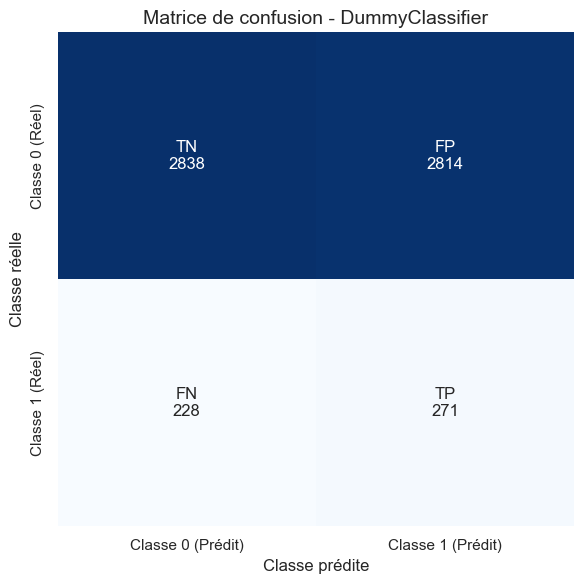

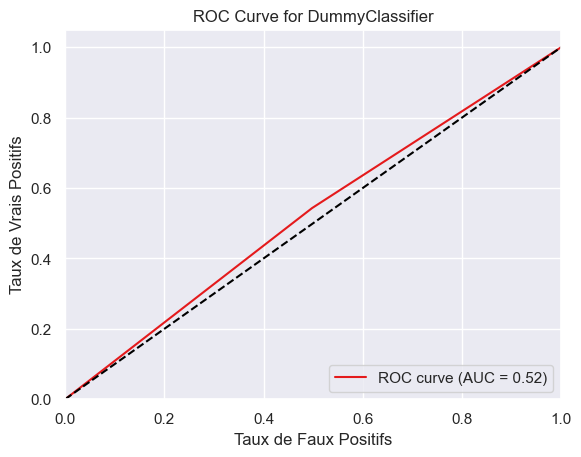

precision    recall  f1-score      support
0.0            0.925636  0.502123  0.651067  5652.000000
1.0            0.087844  0.543086  0.151228   499.000000
accuracy       0.505446  0.505446  0.505446     0.505446
macro avg      0.506740  0.522605  0.401147  6151.000000
weighted avg   0.857670  0.505446  0.610517  6151.000000

F-beta score (beta=2) = 0.26667978744341664
Cross-validated F-beta score (beta=2): 0.24733289454799098
Temps d'exécution pour DummyClassifier : 6.72 secondes


In [59]:
dummy_model = DummyClassifier(strategy='stratified', random_state=42)
dummy_name = 'DummyClassifier'
dummy_auc, dummy_accuracy, dummy_fbeta, dummy_report, dummy_duration = train_and_log_model(dummy_model, dummy_name, data)

## Logistic Regression

2024/10/21 00:37:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model LogisticRegression saved as models/LogisticRegression_pipeline.pkl
Matrice de confusion pour LogisticRegression :
TN (True Negatives): 4061
FP (False Positives): 1591
FN (False Negatives): 206
TP (True Positives): 293


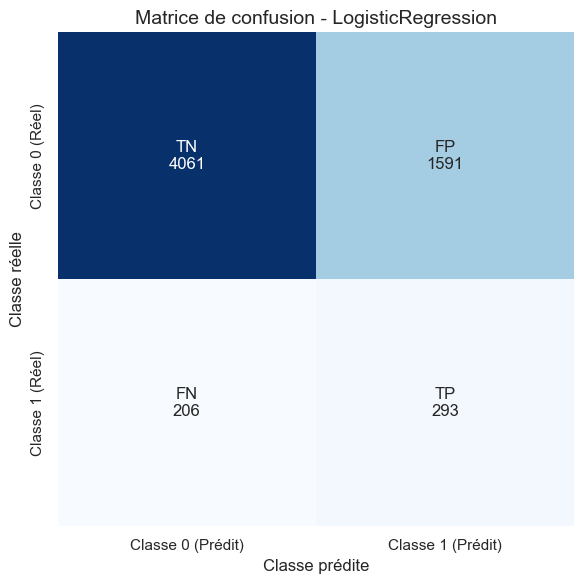

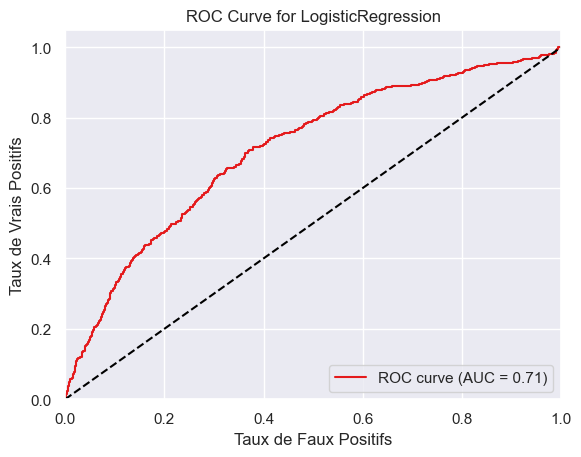

precision    recall  f1-score      support
0.0            0.951723  0.718507  0.818833  5652.000000
1.0            0.155520  0.587174  0.245909   499.000000
accuracy       0.707852  0.707852  0.707852     0.707852
macro avg      0.553621  0.652841  0.532371  6151.000000
weighted avg   0.887131  0.707852  0.772354  6151.000000

F-beta score (beta=2) = 0.37757731958762886
Cross-validated F-beta score (beta=2): 0.38894806760741996
Temps d'exécution pour LogisticRegression : 86.27 secondes


In [60]:
# Logistic Regression
logistic_model = LogisticRegression(solver='liblinear', random_state=42)
logistic_name = 'LogisticRegression'
logistic_auc, logistic_accuracy, logistic_fbeta, logistic_report, logistic_duration = train_and_log_model(logistic_model, logistic_name, data)

## Random Forest

2024/10/21 00:38:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model RandomForest saved as models/RandomForest_pipeline.pkl
Matrice de confusion pour RandomForest :
TN (True Negatives): 5596
FP (False Positives): 56
FN (False Negatives): 478
TP (True Positives): 21


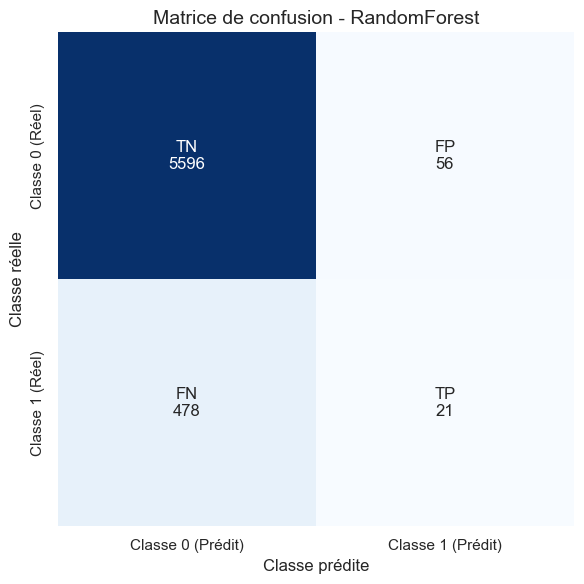

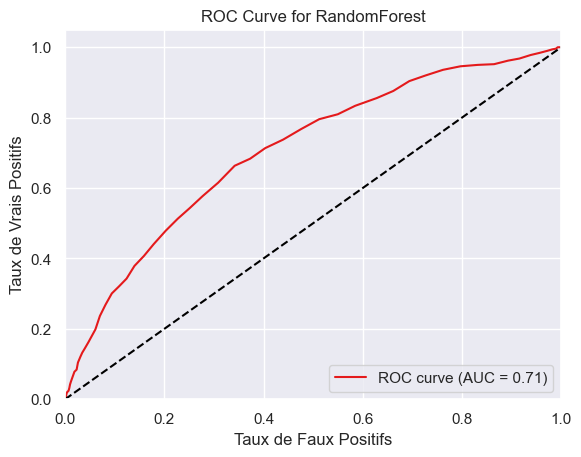

precision    recall  f1-score      support
0.0            0.921304  0.990092  0.954460  5652.000000
1.0            0.272727  0.042084  0.072917   499.000000
accuracy       0.913185  0.913185  0.913185     0.913185
macro avg      0.597016  0.516088  0.513688  6151.000000
weighted avg   0.868688  0.913185  0.882945  6151.000000

F-beta score (beta=2) = 0.05065123010130246
Cross-validated F-beta score (beta=2): 0.0638049273536387
Temps d'exécution pour RandomForest : 69.68 secondes


In [61]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_name = 'RandomForest'
rf_auc, rf_accuracy, rf_fbeta, rf_report, rf_duration = train_and_log_model(rf_model, rf_name, data)

## XGBoost

2024/10/21 00:39:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model XGBoost saved as models/XGBoost_pipeline.pkl
Matrice de confusion pour XGBoost :
TN (True Negatives): 5452
FP (False Positives): 200
FN (False Negatives): 424
TP (True Positives): 75


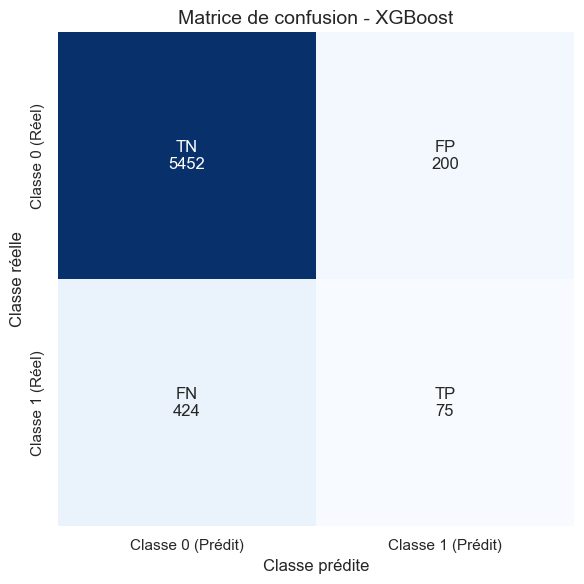

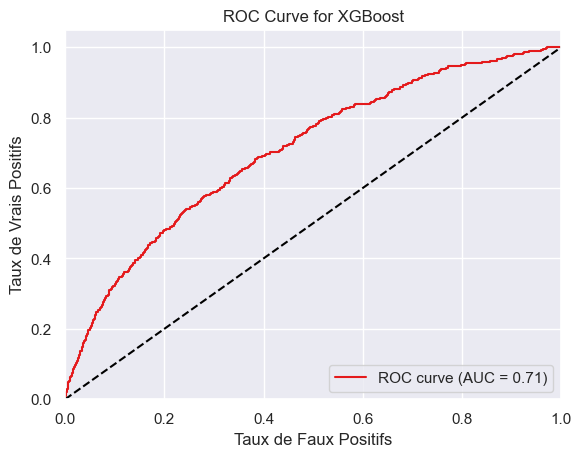

precision    recall  f1-score      support
0.0            0.927842  0.964614  0.945871  5652.000000
1.0            0.272727  0.150301  0.193798   499.000000
accuracy       0.898553  0.898553  0.898553     0.898553
macro avg      0.600285  0.557457  0.569835  6151.000000
weighted avg   0.874696  0.898553  0.884859  6151.000000

F-beta score (beta=2) = 0.16512549537648613
Cross-validated F-beta score (beta=2): 0.16582577530930395
Temps d'exécution pour XGBoost : 16.83 secondes


In [62]:
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_name = 'XGBoost'
xgb_auc, xgb_accuracy, xgb_fbeta, xgb_report, xgb_duration  = train_and_log_model(xgb_model, xgb_name, data)

## Light Gbm

[LightGBM] [Info] Number of positive: 11278, number of negative: 11278
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 119696
[LightGBM] [Info] Number of data points in the train set: 22556, number of used features: 540
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


2024/10/21 00:39:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model LightGBM saved as models/LightGBM_pipeline.pkl
Matrice de confusion pour LightGBM :
TN (True Negatives): 5529
FP (False Positives): 123
FN (False Negatives): 436
TP (True Positives): 63


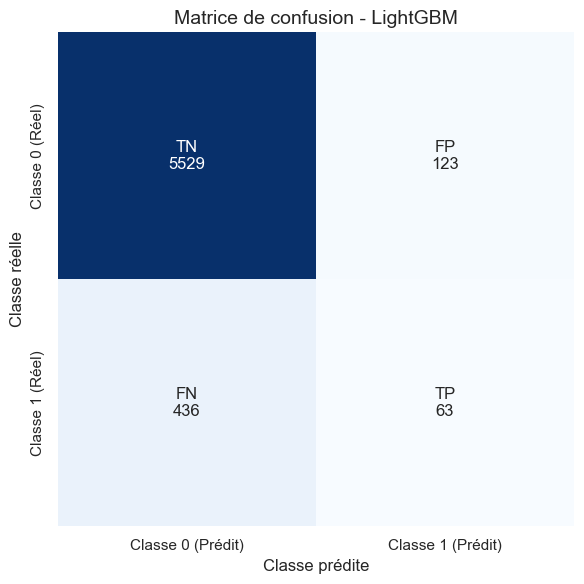

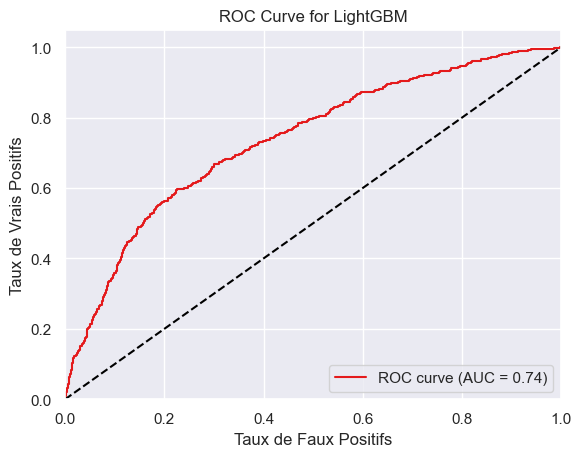

precision    recall  f1-score     support
0.0            0.926907  0.978238  0.951881  5652.00000
1.0            0.338710  0.126253  0.183942   499.00000
accuracy       0.909120  0.909120  0.909120     0.90912
macro avg      0.632808  0.552245  0.567911  6151.00000
weighted avg   0.879189  0.909120  0.889582  6151.00000

F-beta score (beta=2) = 0.14436296975252064
[LightGBM] [Info] Number of positive: 11283, number of negative: 11283
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034768 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 119368
[LightGBM] [Info] Number of data points in the train set: 22566, number of used features: 539
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 11283, number of negative: 11283
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037503 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 118785
[LightGBM] [Info] Number of data points in the train set: 22566, number of used features: 537
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGB

In [63]:
# LightGBM
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(random_state=42)
lgbm_name = 'LightGBM'
lgbm_auc, lgbm_accuracy, lgbm_fbeta, lgbm_report, lgbm_duration = train_and_log_model(lgbm_model, lgbm_name, data)

### Results

In [64]:
# Create results dataframe
res_df = pd.DataFrame({
    'Model': ['Dummy', 'LogisticRegression', 'RandomForest', 'XGBoost', 'LightGBM'],
    'F-beta score': [dummy_fbeta, logistic_fbeta, rf_fbeta,  xgb_fbeta, lgbm_fbeta],
    'AUC score': [dummy_auc, logistic_auc, rf_auc, xgb_auc,lgbm_auc],
    'Accuracy': [dummy_report.loc['accuracy', 'precision'],
                 logistic_report.loc['accuracy', 'precision'],
                 rf_report.loc['accuracy', 'precision'],
                 xgb_report.loc['accuracy', 'precision'],
                 lgbm_report.loc['accuracy', 'precision']],
    'Precision': [dummy_report.loc['macro avg', 'precision'],
                 logistic_report.loc['macro avg', 'precision'],
                 rf_report.loc['macro avg', 'precision'],
                  xgb_report.loc['macro avg', 'precision'],
                 lgbm_report.loc['macro avg', 'precision']],
    'Recall': [dummy_report.loc['macro avg', 'recall'],
               logistic_report.loc['macro avg', 'recall'],
               rf_report.loc['macro avg', 'recall'],
               xgb_report.loc['macro avg', 'recall'],
               lgbm_report.loc['macro avg', 'recall']],
    'F1-score': [dummy_report.loc['macro avg', 'f1-score'],
                 logistic_report.loc['macro avg', 'f1-score'],
                 rf_report.loc['macro avg', 'f1-score'],
                 xgb_report.loc['macro avg', 'f1-score'],
                 lgbm_report.loc['macro avg', 'f1-score']],
        'duration': [dummy_duration, logistic_duration, rf_duration,  xgb_duration, lgbm_duration],
})

display(res_df)

Model  F-beta score  AUC score  Accuracy  Precision    Recall  \
0               Dummy      0.266680   0.522605  0.505446   0.506740  0.522605   
1  LogisticRegression      0.377577   0.709374  0.707852   0.553621  0.652841   
2        RandomForest      0.050651   0.706061  0.913185   0.597016  0.516088   
3             XGBoost      0.165125   0.705975  0.898553   0.600285  0.557457   
4            LightGBM      0.144363   0.736317  0.909120   0.632808  0.552245   

   F1-score   duration  
0  0.401147   6.717771  
1  0.532371  86.270875  
2  0.513688  69.683576  
3  0.569835  16.830931  
4  0.567911  24.700677

In [65]:
#ici avec train test split en amont dans ce cas revoir la fonction train and log :
"""from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import make_scorer, fbeta_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from collections import Counter
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define target and features
TARGET = 'TARGET'
target = data[TARGET].to_numpy()
features = data.drop(columns=TARGET).to_numpy()
features_names = data.drop(columns=TARGET).columns.to_list()

# Define training set size
TRAIN_SIZE = 0.8

# Check missing values
nan_values = data.isna().sum().sum()
print("Missing values = {} ({:.2%})".format(nan_values, nan_values/data.size))

# Define random state
RANDOM_STATE = 42

# Create imputer and fill missing values
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
features_fill = imp_mean.fit_transform(features)

# Split dataset (filled)
x_train, x_test, y_train, y_test = train_test_split(features_fill, target, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

# Define stratified KFold
strat_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# Print training and testing target distribution
y_train_counter = Counter(y_train)
print("Training target statistics:", y_train_counter)
print("Testing target statistics:", Counter(y_test))
print("Ratio is 1:{:.0f}".format(y_train_counter[0] / y_train_counter[1]))

# Define oversampling and undersampling
oversampling = SMOTE(sampling_strategy=0.5, random_state=RANDOM_STATE)  # oversample to 1:2 ratio
undersampling = RandomUnderSampler(sampling_strategy=1, random_state=RANDOM_STATE)  # undersample to 1:1 ratio

# Define scaler
scaler = StandardScaler()

# Define DummyClassifier model
dc = DummyClassifier(strategy='stratified', random_state=RANDOM_STATE)
dc_name = 'DummyClassifier'

# Create pipeline including scaling, SMOTE, undersampling, and model
steps = [
    ('scaler', scaler), 
    ('oversampling', oversampling), 
    ('undersampling', undersampling), 
    ('model', dc)
]

pipeline = ImbPipeline(steps=steps)

# Créer le F-beta scorer avec beta=2
fbeta_scorer = make_scorer(fbeta_score, beta=2)

# Utiliser cross_val_score avec le F-beta scorer pour l'évaluation
dc_fbeta_scores = cross_val_score(pipeline, x_train, y_train, scoring=fbeta_scorer, cv=strat_kf)

# Fit the model sur tout le jeu d'entraînement
pipeline.fit(x_train, y_train)

# Transformer les données de test avec le scaler uniquement
x_test_scaled = scaler.transform(x_test)

# Compute results
dc_fbeta_score, dc_auc, dc_report = compute_classification_results(pipeline, dc_name, x_test_scaled, y_test)

# Save logs
log_mlflow(dc, dc_name, auc_score=dc_auc, custom_score=dc_fbeta_score,
           f1_score=dc_report.loc['weighted avg', 'f1-score'], 
           acc_score=dc_report.loc['accuracy', 'f1-score'],
           train_class_0=Counter(y_train)[0], train_class_1=Counter(y_train)[1])

# Afficher les résultats de cross-validation avec le F-beta scorer
print(f"Cross-validated F-beta scores: {dc_fbeta_scores}")
print(f"Mean F-beta score: {dc_fbeta_scores.mean()}")

# Afficher la distribution des classes avant et après le rééchantillonnage
class_distr_df = pd.DataFrame({'training set': ['unbalanced', 'unbalanced', 'balanced', 'balanced'],
                               'target': ['Class 0', 'Class 1', 'Class 0', 'Class 1'],
                               'count': [y_train_counter[0], y_train_counter[1], Counter(y_train)[0], Counter(y_train)[1]]})

sns.barplot(data=class_distr_df, x='training set', y='count', hue='target')
plt.title("Target distribution")
plt.show()
"""

'from sklearn.impute import SimpleImputer\nfrom sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.dummy import DummyClassifier\nfrom sklearn.metrics import make_scorer, fbeta_score\nfrom imblearn.over_sampling import SMOTE\nfrom imblearn.under_sampling import RandomUnderSampler\nfrom imblearn.pipeline import Pipeline as ImbPipeline\nfrom collections import Counter\nimport numpy as np\nimport pandas as pd\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Define target and features\nTARGET = \'TARGET\'\ntarget = data[TARGET].to_numpy()\nfeatures = data.drop(columns=TARGET).to_numpy()\nfeatures_names = data.drop(columns=TARGET).columns.to_list()\n\n# Define training set size\nTRAIN_SIZE = 0.8\n\n# Check missing values\nnan_values = data.isna().sum().sum()\nprint("Missing values = {} ({:.2%})".format(nan_values, nan_values/data.size))\n\n# Define

In [66]:
"""from sklearn.linear_model import LogisticRegression

# Définir le modèle
logistic_model = LogisticRegression(solver='liblinear', random_state=42)
logistic_name = 'LogisticRegression'

# Entraîner et afficher les résultats
logistic_auc, logistic_accuracy = train_and_log_model(logistic_model, logistic_name, x_train, y_train, x_test, y_test)"""

"from sklearn.linear_model import LogisticRegression\n\n# Définir le modèle\nlogistic_model = LogisticRegression(solver='liblinear', random_state=42)\nlogistic_name = 'LogisticRegression'\n\n# Entraîner et afficher les résultats\nlogistic_auc, logistic_accuracy = train_and_log_model(logistic_model, logistic_name, x_train, y_train, x_test, y_test)"

In [67]:
"""from random forest import RandomForestClassifier

# Définir le modèle
randomforest_model = RandomForestClassifier(random_state=42)
randomforest_name = 'RandomForest'

# Entraîner et afficher les résultats
randomforest_auc, randomforest_accuracy = train_and_log_model(randomforest_model, randomforest_name, x_train, y_train, x_test, y_test)"""

"from random forest import RandomForestClassifier\n\n# Définir le modèle\nrandomforest_model = RandomForestClassifier(random_state=42)\nrandomforest_name = 'RandomForest'\n\n# Entraîner et afficher les résultats\nrandomforest_auc, randomforest_accuracy = train_and_log_model(randomforest_model, randomforest_name, x_train, y_train, x_test, y_test)"

In [68]:
"""from xgboost import XGBClassifier

# Définir le modèle
xgboost_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgboost_name = 'XGBoost'

# Entraîner et afficher les résultats
xgboost_auc, xgboost_accuracy = train_and_log_model(xgboost_model, xgboost_name, x_train, y_train, x_test, y_test)"""


"from xgboost import XGBClassifier\n\n# Définir le modèle\nxgboost_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)\nxgboost_name = 'XGBoost'\n\n# Entraîner et afficher les résultats\nxgboost_auc, xgboost_accuracy = train_and_log_model(xgboost_model, xgboost_name, x_train, y_train, x_test, y_test)"

In [69]:
"""from lightgbm import LGBMClassifier

# Définir le modèle
lightgbm_model = LGBMClassifier(random_state=42)
lightgbm_name = 'LightGBM'

# Entraîner et afficher les résultats
lightgbm_auc, lightgbm_accuracy = train_and_log_model(lightgbm_model, lightgbm_name, x_train, y_train, x_test, y_test)"""

"from lightgbm import LGBMClassifier\n\n# Définir le modèle\nlightgbm_model = LGBMClassifier(random_state=42)\nlightgbm_name = 'LightGBM'\n\n# Entraîner et afficher les résultats\nlightgbm_auc, lightgbm_accuracy = train_and_log_model(lightgbm_model, lightgbm_name, x_train, y_train, x_test, y_test)"

In [70]:
# Un F-beta score (beta=2) = 0.2491 signifie que le modèle a une performance relativement faible, surtout lorsqu'on privilégie le rappel (la capacité à identifier les vrais positifs).
# Cela peut indiquer que le modèle n'identifie pas bien les cas positifs ou fait trop d'erreurs de faux négatifs (c'est-à-dire, ne détecte pas correctement ceux qui devraient être identifiés comme positifs).


La matrice de confusion que vous avez fournie représente les performances d'un modèle de classification, ici spécifiquement un DummyClassifier, qui est souvent utilisé comme point de référence pour comparer les performances de modèles plus sophistiqués. Voici comment interpréter chaque partie de cette matrice de confusion :

Composition de la Matrice de Confusion
Axe vertical (True Label) : Les vraies étiquettes des données, où 0.0 représente la classe négative (par exemple, clients sans difficulté de paiements) et 1.0 représente la classe positive (par exemple, clients avec difficultés de paiements).
Axe horizontal (Predicted Label) : Les prédictions du modèle, où 0.0 et 1.0 suivent la même logique que les étiquettes vraies.
Valeurs dans la Matrice
Haut Gauche (True Negative, TN) : Nombre de prédictions correctes où le modèle a prédit la classe négative correctement, soit 28,238.
Haut Droit (False Positive, FP) : Nombre de prédictions incorrectes où le modèle a prédit la classe positive alors que la vraie classe était négative, soit 28,243.
Bas Gauche (False Negative, FN) : Nombre de prédictions incorrectes où le modèle a prédit la classe négative alors que la vraie classe était positive, soit 2,487.
Bas Droit (True Positive, TP) : Nombre de prédictions correctes où le modèle a prédit la classe positive correctement, soit 2,534.
Interprétation
Performance Générale : En regardant les valeurs TP et TN, vous pouvez voir que le modèle a une performance relativement équilibrée en termes de prédiction des deux classes, mais avec une très légère préférence pour prédire incorrectement la classe positive comme négative (FP élevé).
Précision et Rappel :
Précision pour la classe 0 est calculée comme 
TN
/
(
TN
+
FN
)
TN/(TN+FN), et pour la classe 1 comme 
TP
/
(
TP
+
FP
)
TP/(TP+FP).
Rappel pour la classe 0 est 
TN
/
(
TN
+
FP
)
TN/(TN+FP), et pour la classe 1 
TP
/
(
TP
+
FN
)
TP/(TP+FN).
Équilibre des Erreurs : La proportion de FP et FN montre que le modèle est aussi susceptible de prédire incorrectement les vrais négatifs que les vrais positifs.
Conclusion
La performance de ce DummyClassifier suggère qu'il prédit les classes en se basant probablement sur une distribution aléatoire ou une stratégie très simple, ce qui entraîne un grand nombre de faux positifs et de faux négatifs. Cette performance peut servir de ligne de base pour évaluer des modèles plus avancés. Un modèle utile devrait idéalement surpasser ce DummyClassifier en réduisant significativement les erreurs de type FP et FN tout en augmentant les valeurs TN et TP.

**The best model regarding our business score is the XGBoost model.**
<br>I decide to select this model for the project. 

Let's tune its hyperparameters.

# two-step process for optimizing XGBoost best model

## Hyperparametrization

In [71]:
# XGBoost hyperparameter optimisation avec hyperopt

In [72]:
#Hyperopt : Remplace GridSearchCV pour une exploration plus flexible et potentiellement plus rapide de l'espace des hyperparamètre

In [73]:
"""espace de recherche pour les hyperparamètres importants comme :

max_depth : La profondeur maximale des arbres de décision.
subsample : Fraction des données d'entraînement à utiliser pour chaque arbre.
colsample_bytree : Fraction des colonnes à échantillonner pour chaque arbre.
learning_rate : Taux d'apprentissage.
min_child_weight : Critère de régularisation (influence la complexité de l'arbre).
n_estimators : Nombre d'arbres dans le modèle."""


"espace de recherche pour les hyperparamètres importants comme :\n\nmax_depth : La profondeur maximale des arbres de décision.\nsubsample : Fraction des données d'entraînement à utiliser pour chaque arbre.\ncolsample_bytree : Fraction des colonnes à échantillonner pour chaque arbre.\nlearning_rate : Taux d'apprentissage.\nmin_child_weight : Critère de régularisation (influence la complexité de l'arbre).\nn_estimators : Nombre d'arbres dans le modèle."

In [74]:
def check_label_encoding(y_train, y_test):
    # Import numpy pour manipuler les labels
    import numpy as np

    # Obtenir les valeurs uniques dans les ensembles de labels
    unique_train = np.unique(y_train)
    unique_test = np.unique(y_test)

    # Vérifier si les valeurs uniques sont dans l'intervalle attendu [0, n-1]
    expected_train_range = np.arange(len(unique_train))
    expected_test_range = np.arange(len(unique_test))

    # Comparer les ensembles de valeurs uniques avec les plages attendues
    correctly_encoded_train = np.array_equal(unique_train, expected_train_range)
    correctly_encoded_test = np.array_equal(unique_test, expected_test_range)

    # Afficher les résultats de la vérification
    print("Train labels are correctly encoded:", correctly_encoded_train)
    print("Unique values in train labels:", unique_train)
    print("Test labels are correctly encoded:", correctly_encoded_test)
    print("Unique values in test labels:", unique_test)

check_label_encoding(y_train, y_test)


Train labels are correctly encoded: True
Unique values in train labels: [0. 1.]
Test labels are correctly encoded: True
Unique values in test labels: [0. 1.]


In [75]:
"""import os
import mlflow
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import make_scorer, fbeta_score
import xgboost as xgb
import joblib
import numpy as np

def optimize_xgb_hyperopt(data, target_name='TARGET', train_size=0.8, random_state=42, beta=2, max_evals=50):
    model_dir = "../models"
    os.makedirs(model_dir, exist_ok=True)
    
    target = data[target_name].to_numpy()
    features = data.drop(columns=[target_name]).to_numpy()
    x_train, x_test, y_train, y_test = train_test_split(features, target, train_size=train_size, random_state=random_state)
    
    # Pipeline for preprocessing
    preprocess_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    # Fit and transform training data, and transform testing data
    x_train_prepared = preprocess_pipeline.fit_transform(x_train)
    x_test_prepared = preprocess_pipeline.transform(x_test)

    # Oversampling and undersampling applied only to training data
    sampler = ImbPipeline([
        ('oversampling', SMOTE(sampling_strategy=0.5, random_state=random_state)),
        ('undersampling', RandomUnderSampler(sampling_strategy=1, random_state=random_state))
    ])
    
    x_train_resampled, y_train_resampled = sampler.fit_resample(x_train_prepared, y_train)

    # Define the hyperparameter space
    xgb_space = {
        'max_depth': hp.choice('max_depth', range(3, 10)),
        'subsample': hp.uniform('subsample', 0.5, 1.0),
        'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0),
        'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
        'n_estimators': hp.choice('n_estimators', range(50, 301, 50)),
        'min_child_weight': hp.choice('min_child_weight', range(1, 6))
    }

    # Objective function for Hyperopt
    def objective(params):
        model = xgb.XGBClassifier(**params, random_state=random_state, eval_metric='logloss')
        fbeta_scorer = make_scorer(fbeta_score, beta=beta)
        score = cross_val_score(model, x_train_resampled, y_train_resampled, cv=5, scoring=fbeta_scorer).mean()
        return {'loss': -score, 'status': STATUS_OK}

    # Execute optimization
    trials = Trials()
    best = fmin(fn=objective, space=xgb_space, algo=tpe.suggest, max_evals=max_evals, trials=trials)
    
    # Extract the best model parameters
    best_params = {param: trials.best_trial['misc']['vals'][param][0] for param in xgb_space.keys()}
    best_model = xgb.XGBClassifier(**best_params, random_state=random_state, eval_metric='logloss')
    best_model.fit(x_train_resampled, y_train_resampled)
    
    y_pred = best_model.predict(x_test_prepared)
    final_fbeta = fbeta_score(y_test, y_pred, beta=beta)

    # Save the model
    model_path = f"../models/{target_name}_xgb_hyperopt_tuned.pkl"
    joblib.dump(best_model, model_path)
    mlflow.log_artifact(model_path)
    
    # Log final metrics
    mlflow.log_metric("final_fbeta", final_fbeta)
    
    return x_test_prepared, y_test, y_pred, final_fbeta, best_params

# Use the function
x_test_prepared, y_test, y_pred, final_fbeta, best_hyperparams = optimize_xgb_hyperopt(data)
print(f"Final F-beta score: {final_fbeta}")"""


'import os\nimport mlflow\nfrom hyperopt import hp, fmin, tpe, Trials, STATUS_OK\nfrom sklearn.model_selection import train_test_split, cross_val_score\nfrom sklearn.impute import SimpleImputer\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.pipeline import Pipeline\nfrom imblearn.pipeline import Pipeline as ImbPipeline\nfrom imblearn.over_sampling import SMOTE\nfrom imblearn.under_sampling import RandomUnderSampler\nfrom sklearn.metrics import make_scorer, fbeta_score\nimport xgboost as xgb\nimport joblib\nimport numpy as np\n\ndef optimize_xgb_hyperopt(data, target_name=\'TARGET\', train_size=0.8, random_state=42, beta=2, max_evals=50):\n    model_dir = "../models"\n    os.makedirs(model_dir, exist_ok=True)\n    \n    target = data[target_name].to_numpy()\n    features = data.drop(columns=[target_name]).to_numpy()\n    x_train, x_test, y_train, y_test = train_test_split(features, target, train_size=train_size, random_state=random_state)\n    \n    # Pipeline for prepr

In [76]:
"""
# Calculating the improvement
improvement = (final_fbeta - xgb_fbeta) / xgb_fbeta if xgb_fbeta else 0
print(f"\nImprovement in F-beta score: {improvement:.2%}")"""


'\n# Calculating the improvement\nimprovement = (final_fbeta - xgb_fbeta) / xgb_fbeta if xgb_fbeta else 0\nprint(f"\nImprovement in F-beta score: {improvement:.2%}")'

In [77]:
mlflow.end_run()

In [78]:
"""import os
import mlflow
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import train_test_split, cross_val_score  # Corrected import here
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import make_scorer, fbeta_score  # keep these in sklearn.metrics
import xgboost as xgb
import joblib
import numpy as np

def optimize_xgb(data, target_name='TARGET', train_size=0.8, random_state=42, beta=2, max_evals=10):
    target = data[target_name].to_numpy()
    features = data.drop(columns=[target_name]).to_numpy()
    
    x_train, x_test, y_train, y_test = train_test_split(features, target, train_size=train_size, random_state=random_state)

    # Pipeline de prétraitement sans rééquilibrage
    preprocess_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
    ])
    
    # Préparer les données d'entraînement et de test
    x_train_prepared = preprocess_pipeline.fit_transform(x_train)
    x_test_prepared = preprocess_pipeline.transform(x_test)

    # Rééquilibrage appliqué uniquement sur les données d'entraînement
    sampler = ImbPipeline([
        ('oversampling', SMOTE(sampling_strategy=0.5, random_state=random_state)),
        ('undersampling', RandomUnderSampler(sampling_strategy=1, random_state=random_state))
    ])
    
    x_train_resampled, y_train_resampled = sampler.fit_resample(x_train_prepared, y_train)

    # Définition de l'espace des hyperparamètres pour XGBoost
    xgb_space = {
        'max_depth': hp.choice('max_depth', range(3, 10)),
        'subsample': hp.uniform('subsample', 0.5, 1.0),
        'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0),
        'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
        'n_estimators': hp.choice('n_estimators', range(50, 301, 50)),
        'min_child_weight': hp.choice('min_child_weight', range(1, 6))
    }

    def objective(params):
        model = xgb.XGBClassifier(**params, random_state=random_state, use_label_encoder=False, eval_metric='logloss')
        fbeta_scorer = make_scorer(fbeta_score, beta=beta)
        score = cross_val_score(model, x_train_resampled, y_train_resampled, cv=5, scoring=fbeta_scorer).mean()
        return {'loss': -score, 'status': STATUS_OK}

    trials = Trials()
    best = fmin(fn=objective, space=xgb_space, algo=tpe.suggest, max_evals=max_evals, trials=trials)
    best_params = {param: trials.best_trial['misc']['vals'][param][0] for param in xgb_space.keys()}
    
    best_model = xgb.XGBClassifier(**best_params, random_state=random_state, use_label_encoder=False, eval_metric='logloss')
    best_model.fit(x_train_resampled, y_train_resampled)

    y_pred = best_model.predict(x_test_prepared)
    final_fbeta = fbeta_score(y_test, y_pred, beta=beta)
    
    model_path = f"../models/{target_name}_xgb_hyperopt_tuned.pkl"
    joblib.dump(best_model, model_path)
    mlflow.log_artifact(model_path)
    mlflow.log_metric("final_fbeta", final_fbeta)

    return best_model, final_fbeta, best_params


# Utilisation de la fonction
best_model, best_fbeta, best_hyperparams = optimize_xgb(data)
xgb_tuned_model = xgb.XGBClassifier(random_state=42)
xgb_tuned_name = 'XGBoost'
xgb_tuned_auc, xgb_tuned_accuracy, xgb_tuned_fbeta, xgb_tuned_report, xgb_tuned_duration  = train_and_log_model(xgb_tuned_model, xgb_tuned_name, data)
xgb_score_imp = (xgb_fbeta - xgb_tuned_fbeta) / xgb_fbeta
print("The XGBoost model improved the business score by {:.1%}".format(xgb_score_imp))
"""

'import os\nimport mlflow\nfrom hyperopt import fmin, tpe, hp, STATUS_OK, Trials\nfrom sklearn.model_selection import train_test_split, cross_val_score  # Corrected import here\nfrom sklearn.impute import SimpleImputer\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.pipeline import Pipeline\nfrom imblearn.pipeline import Pipeline as ImbPipeline\nfrom imblearn.over_sampling import SMOTE\nfrom imblearn.under_sampling import RandomUnderSampler\nfrom sklearn.metrics import make_scorer, fbeta_score  # keep these in sklearn.metrics\nimport xgboost as xgb\nimport joblib\nimport numpy as np\n\ndef optimize_xgb(data, target_name=\'TARGET\', train_size=0.8, random_state=42, beta=2, max_evals=10):\n    target = data[target_name].to_numpy()\n    features = data.drop(columns=[target_name]).to_numpy()\n    \n    x_train, x_test, y_train, y_test = train_test_split(features, target, train_size=train_size, random_state=random_state)\n\n    # Pipeline de prétraitement sans rééquilibrage\

In [79]:
mlflow.end_run()

In [80]:
"""import os
import mlflow
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import make_scorer, fbeta_score, classification_report
import xgboost as xgb
import joblib
import numpy as np

# Fonction pour optimiser et comparer les modèles
def optimize_xgb(data, target_name='TARGET', train_size=0.8, random_state=42, beta=2, max_evals=10):
    target = data[target_name].to_numpy()
    features = data.drop(columns=[target_name]).to_numpy()
    
    x_train, x_test, y_train, y_test = train_test_split(features, target, train_size=train_size, random_state=random_state)

    # Pipeline de prétraitement
    preprocess_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
    ])
    
    x_train_prepared = preprocess_pipeline.fit_transform(x_train)
    x_test_prepared = preprocess_pipeline.transform(x_test)

    # Rééquilibrage appliqué uniquement sur les données d'entraînement
    sampler = ImbPipeline([
        ('oversampling', SMOTE(sampling_strategy=0.5, random_state=random_state)),
        ('undersampling', RandomUnderSampler(sampling_strategy=1, random_state=random_state))
    ])
    
    x_train_resampled, y_train_resampled = sampler.fit_resample(x_train_prepared, y_train)

    # Espace des hyperparamètres pour XGBoost
    xgb_space = {
        'max_depth': hp.choice('max_depth', range(3, 10)),
        'subsample': hp.uniform('subsample', 0.5, 1.0),
        'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0),
        'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
        'n_estimators': hp.choice('n_estimators', range(50, 301, 50)),
        'min_child_weight': hp.choice('min_child_weight', range(1, 6))
    }

    # Fonction objectif pour Hyperopt
    def objective(params):
        model = xgb.XGBClassifier(**params, random_state=random_state, eval_metric='logloss')
        fbeta_scorer = make_scorer(fbeta_score, beta=beta)
        score = cross_val_score(model, x_train_resampled, y_train_resampled, cv=5, scoring=fbeta_scorer).mean()
        return {'loss': -score, 'status': STATUS_OK}

    try:
        mlflow.start_run()
        trials = Trials()
        best = fmin(fn=objective, space=xgb_space, algo=tpe.suggest, max_evals=max_evals, trials=trials)
        best_params = {param: trials.best_trial['misc']['vals'][param][0] for param in xgb_space.keys()}
        
        # Entraînement du modèle optimisé
        best_model = xgb.XGBClassifier(**best_params, random_state=random_state, eval_metric='logloss')
        best_model.fit(x_train_resampled, y_train_resampled)

        # Évaluation du modèle optimisé
        y_pred_optimized = best_model.predict(x_test_prepared)
        final_fbeta_optimized = fbeta_score(y_test, y_pred_optimized, beta=beta)
        clf_report_optimized = classification_report(y_test, y_pred_optimized, output_dict=True)
        
        model_path = f"../models/{target_name}_xgb_hyperopt_tuned.pkl"
        joblib.dump(best_model, model_path)
        mlflow.log_artifact(model_path)
        mlflow.log_metric("final_fbeta_optimized", final_fbeta_optimized)

        print(f"Optimized model F-beta (beta={beta}): {final_fbeta_optimized}")
    
    finally:
        mlflow.end_run()

    # Comparaison avec le modèle non optimisé
    non_optimized_model = xgb.XGBClassifier(random_state=random_state, eval_metric='logloss')
    non_optimized_model.fit(x_train_resampled, y_train_resampled)

    y_pred_non_optimized = non_optimized_model.predict(x_test_prepared)
    final_fbeta_non_optimized = fbeta_score(y_test, y_pred_non_optimized, beta=beta)
    clf_report_non_optimized = classification_report(y_test, y_pred_non_optimized, output_dict=True)

    print(f"Non-optimized model F-beta (beta={beta}): {final_fbeta_non_optimized}")

    return best_model, final_fbeta_optimized, best_params, clf_report_optimized, final_fbeta_non_optimized, clf_report_non_optimized

# Appel de la fonction avec comparaison
best_model, final_fbeta_optimized, best_hyperparams, clf_report_optimized, final_fbeta_non_optimized, clf_report_non_optimized = optimize_xgb(data)

# Affichage des résultats
print("=== Optimized Model Classification Report ===")
display(clf_report_optimized)
print("\n=== Non-Optimized Model Classification Report ===")
display(clf_report_non_optimized)
"""

'import os\nimport mlflow\nfrom hyperopt import fmin, tpe, hp, STATUS_OK, Trials\nfrom sklearn.model_selection import train_test_split, cross_val_score\nfrom sklearn.impute import SimpleImputer\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.pipeline import Pipeline\nfrom imblearn.pipeline import Pipeline as ImbPipeline\nfrom imblearn.over_sampling import SMOTE\nfrom imblearn.under_sampling import RandomUnderSampler\nfrom sklearn.metrics import make_scorer, fbeta_score, classification_report\nimport xgboost as xgb\nimport joblib\nimport numpy as np\n\n# Fonction pour optimiser et comparer les modèles\ndef optimize_xgb(data, target_name=\'TARGET\', train_size=0.8, random_state=42, beta=2, max_evals=10):\n    target = data[target_name].to_numpy()\n    features = data.drop(columns=[target_name]).to_numpy()\n    \n    x_train, x_test, y_train, y_test = train_test_split(features, target, train_size=train_size, random_state=random_state)\n\n    # Pipeline de prétraitement\n  

## Comparison before/after hyperparametrization

In [81]:
import os
import mlflow
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import make_scorer, fbeta_score, classification_report, roc_curve, roc_auc_score
import xgboost as xgb
import joblib
import numpy as np

# Fonction pour optimiser et comparer les modèles
def optimize_xgb(data, target_name='TARGET', train_size=0.8, random_state=42, beta=2, max_evals=10):
    target = data[target_name].to_numpy()
    features = data.drop(columns=[target_name]).to_numpy()
    
    x_train, x_test, y_train, y_test = train_test_split(features, target, train_size=train_size, random_state=random_state)

    # Pipeline de prétraitement
    preprocess_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
    ])
    
    x_train_prepared = preprocess_pipeline.fit_transform(x_train)
    x_test_prepared = preprocess_pipeline.transform(x_test)

    # Rééquilibrage appliqué uniquement sur les données d'entraînement
    sampler = ImbPipeline([
        ('oversampling', SMOTE(sampling_strategy=0.5, random_state=random_state)),
        ('undersampling', RandomUnderSampler(sampling_strategy=1, random_state=random_state))
    ])
    
    x_train_resampled, y_train_resampled = sampler.fit_resample(x_train_prepared, y_train)

    # Espace des hyperparamètres pour XGBoost
    xgb_space = {
        'max_depth': hp.choice('max_depth', range(3, 10)),
        'subsample': hp.uniform('subsample', 0.5, 1.0),
        'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0),
        'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
        'n_estimators': hp.choice('n_estimators', range(50, 301, 50)),
        'min_child_weight': hp.choice('min_child_weight', range(1, 6))
    }

    # Fonction objectif pour Hyperopt
    def objective(params):
        model = xgb.XGBClassifier(**params, random_state=random_state, eval_metric='logloss')
        fbeta_scorer = make_scorer(fbeta_score, beta=beta)
        score = cross_val_score(model, x_train_resampled, y_train_resampled, cv=5, scoring=fbeta_scorer).mean()
        return {'loss': -score, 'status': STATUS_OK}

    try:
        mlflow.start_run()
        trials = Trials()
        best = fmin(fn=objective, space=xgb_space, algo=tpe.suggest, max_evals=max_evals, trials=trials)
        best_params = {param: trials.best_trial['misc']['vals'][param][0] for param in xgb_space.keys()}
        
        # Entraînement du modèle optimisé
        best_model = xgb.XGBClassifier(**best_params, random_state=random_state, eval_metric='logloss')
        best_model.fit(x_train_resampled, y_train_resampled)

        # Évaluation du modèle optimisé avec prédiction des probabilités
        y_pred_proba_optimized = best_model.predict_proba(x_test_prepared)[:, 1]
        y_pred_optimized = (y_pred_proba_optimized >= 0.5).astype(int)
        final_fbeta_optimized = fbeta_score(y_test, y_pred_optimized, beta=beta)
        clf_report_optimized = classification_report(y_test, y_pred_optimized, output_dict=True)

        # Sauvegarder le modèle optimisé
        model_path = f"../models/{target_name}_xgb_hyperopt_tuned.pkl"
        joblib.dump(best_model, model_path)
        mlflow.log_artifact(model_path)
        mlflow.log_metric("final_fbeta_optimized", final_fbeta_optimized)

        print(f"Optimized model F-beta (beta={beta}): {final_fbeta_optimized}")
    
    finally:
        mlflow.end_run()

    # Comparaison avec le modèle non optimisé
    non_optimized_model = xgb.XGBClassifier(random_state=random_state, eval_metric='logloss')
    non_optimized_model.fit(x_train_resampled, y_train_resampled)

    y_pred_proba_non_optimized = non_optimized_model.predict_proba(x_test_prepared)[:, 1]
    y_pred_non_optimized = (y_pred_proba_non_optimized >= 0.5).astype(int)
    final_fbeta_non_optimized = fbeta_score(y_test, y_pred_non_optimized, beta=beta)
    clf_report_non_optimized = classification_report(y_test, y_pred_non_optimized, output_dict=True)

    print(f"Non-optimized model F-beta (beta={beta}): {final_fbeta_non_optimized}")

    return (best_model, final_fbeta_optimized, best_params, clf_report_optimized, y_pred_proba_optimized,
            final_fbeta_non_optimized, clf_report_non_optimized, y_pred_proba_non_optimized, y_test)

# Appel de la fonction avec comparaison
(best_model, final_fbeta_optimized, best_hyperparams, clf_report_optimized, y_pred_proba_optimized,
 final_fbeta_non_optimized, clf_report_non_optimized, y_pred_proba_non_optimized, y_test) = optimize_xgb(data)

# Affichage des résultats
print("=== Optimized Model Classification Report ===")
display(clf_report_optimized)
print("\n=== Non-Optimized Model Classification Report ===")
display(clf_report_non_optimized)



100%|██████████| 10/10 [02:15<00:00, 13.51s/trial, best loss: -0.8179010976630756]


/Users/laureagrech/oc7_venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/laureagrech/oc7_venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/laureagrech/oc7_venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Optimized model F-beta (beta=2): 0.30624769853933964
Non-optimized model F-beta (beta=2): 0.15251989389920426
=== Optimized Model Classification Report ===


{'0.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 5652.0},
 '1.0': {'precision': 0.08112502032189887,
  'recall': 1.0,
  'f1-score': 0.1500751879699248,
  'support': 499.0},
 'accuracy': 0.08112502032189887,
 'macro avg': {'precision': 0.04056251016094944,
  'recall': 0.5,
  'f1-score': 0.0750375939849624,
  'support': 6151.0},
 'weighted avg': {'precision': 0.006581268922228506,
  'recall': 0.08112502032189887,
  'f1-score': 0.012174852673872945,
  'support': 6151.0}}


=== Non-Optimized Model Classification Report ===


{'0.0': {'precision': 0.9269328802039083,
  'recall': 0.9651450813871196,
  'f1-score': 0.9456531160613678,
  'support': 5652.0},
 '1.0': {'precision': 0.2593984962406015,
  'recall': 0.13827655310621242,
  'f1-score': 0.1803921568627451,
  'support': 499.0},
 'accuracy': 0.8980653552267924,
 'macro avg': {'precision': 0.5931656882222549,
  'recall': 0.551710817246666,
  'f1-score': 0.5630226364620564,
  'support': 6151.0},
 'weighted avg': {'precision': 0.8727791397393188,
  'recall': 0.8980653552267924,
  'f1-score': 0.8835713051948237,
  'support': 6151.0}}

In [82]:
#xgb_auc, xgb_accuracy, xgb_fbeta, xgb_report, xgb_duration  = train_and_log_model(xgb_model, xgb_name, data)

## Custom threshold

In [83]:
#further refine how the model makes predictions by adjusting the decision threshold

"""Cette partie du notebook est utilisée pour explorer et ajuster le seuil de classification d'un modèle XGBoost afin d'améliorer ses performances.

Dans le contexte des modèles de classification, le seuil (ou threshold) par défaut pour décider si une prédiction est de la classe positive ou négative est généralement de 0.5. Cela signifie que si la probabilité prédite est supérieure ou égale à 0.5, alors la prédiction appartient à la classe positive ; sinon, elle appartient à la classe négative.

Cependant, dans certaines applications, il peut être bénéfique de modifier ce seuil afin de mieux équilibrer les métriques de performance telles que le rappel, la précision, la F-mesure, et surtout dans des cas où l'un des types d'erreur (faux positif ou faux négatif) est plus coûteux.

Processus dans ce code:
1. **Calcul des probabilités :** Le modèle XGBoost calcule les probabilités que chaque échantillon appartient à la classe positive. Ces probabilités sont stockées dans `xgbc_proba`.

2. **Courbe ROC et identification du seuil optimal :** La courbe ROC est utilisée pour analyser la performance du modèle à différents seuils de classification. Le point optimal donné par la ROC est utilisé comme référence pour ajuster le seuil

3. **Ajustement du seuil de classification :** 
    - Différents seuils (0.5, 0.3, 0.15, 0.1) sont employés pour observer comment ils influencent les métriques de performance du modèle telles que la matrice de confusion et le F-beta score.
    - Pour chaque seuil, la matrice de confusion est affichée, le F-beta score est calculé et le rapport de classification est généré. 

En ajustant le seuil, il est possible de contrôler le compromis entre la précision et le rappel du modèle, et ainsi d'améliorer le score de performance global selon les besoins du problème traité. Cela permet de personnaliser le modèle aux exigences spécifiques liées aux faux positifs et faux négatifs."""

Utilisation du Meilleur Seuil : Une fois le modèle entraîné avec les meilleurs hyperparamètres,
on utilise la courbe Precision-Recall pour déterminer le seuil optimal qui maximise le score F-beta. Ce seuil devrait ensuite être utilisé pour prendre les décisions finales de classification.

The best prediction threshold is given by the point where the true positive rate and false positive rate are the lower.


Let's try different value of the prediction threshold : 
* 0.5 - Default
* 0.3 - Optimized
* 0.15 - Approximately the thresold given by the ROC curve
* 0.1 - Lower value than the thresold given by the ROC curve

In [84]:
import numpy as np
from sklearn.metrics import fbeta_score, precision_recall_curve

In [85]:
def find_best_threshold(y_true, y_pred_proba, beta=2):
    # Calcul des scores de précision, de rappel et des seuils associés
    # Ces scores sont calculés pour différents seuils de classification
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred_proba)
    
    fbeta_scores = []  # Liste pour stocker les scores F-beta calculés
    
    # Boucle sur chaque paire de précision et de rappel
    for prec, rec in zip(precision, recall):
        # Prévenir la division par zéro si la précision et le rappel sont tous deux zéro
        if prec + rec == 0:
            fbeta_scores.append(0)
        else:
            # Calcul du score F-beta en utilisant la formule
            score = (1 + beta**2) * (prec * rec) / ((beta**2 * prec) + rec)
            fbeta_scores.append(score)
    
    # Trouver l'indice du meilleur score F-beta
    best_idx = np.nanargmax(fbeta_scores)  # Utilisation de nanargmax pour gérer les possibles NaNs
    best_threshold = thresholds[best_idx] if best_idx < len(thresholds) else 1.0  # Sécurité en cas d'indice hors limite
    best_score = fbeta_scores[best_idx]
    
    return best_threshold, best_score

In [86]:
def optimize_xgb(data, target_name='TARGET', train_size=0.8, random_state=42, beta=2, max_evals=10):
    model_dir = "../models"
    os.makedirs(model_dir, exist_ok=True)
    
    target = data[target_name].to_numpy()
    features = data.drop(columns=[target_name]).to_numpy()
    x_train, x_test, y_train, y_test = train_test_split(features, target, train_size=train_size, random_state=random_state)

    preprocess_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
    ])
    
    x_train_prepared = preprocess_pipeline.fit_transform(x_train)
    x_test_prepared = preprocess_pipeline.transform(x_test)

    sampler = ImbPipeline([
        ('oversampling', SMOTE(sampling_strategy=0.5, random_state=random_state)),
        ('undersampling', RandomUnderSampler(sampling_strategy=1, random_state=random_state))
    ])
    
    x_train_resampled, y_train_resampled = sampler.fit_resample(x_train_prepared, y_train)

    xgb_space = {
        'max_depth': hp.choice('max_depth', range(3, 10)),
        'subsample': hp.uniform('subsample', 0.5, 1.0),
        'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0),
        'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
        'n_estimators': hp.choice('n_estimators', range(50, 301, 50)),
        'min_child_weight': hp.choice('min_child_weight', range(1, 6))
    }

    try:
        mlflow.start_run()
        def objective(params):
            model = xgb.XGBClassifier(**params, random_state=random_state, eval_metric='logloss')
            fbeta_scorer = make_scorer(fbeta_score, beta=beta)
            score = cross_val_score(model, x_train_resampled, y_train_resampled, cv=5, scoring=fbeta_scorer).mean()
            return {'loss': -score, 'status': STATUS_OK}

        trials = Trials()
        best = fmin(fn=objective, space=xgb_space, algo=tpe.suggest, max_evals=max_evals, trials=trials)
        best_params = {param: trials.best_trial['misc']['vals'][param][0] for param in xgb_space.keys()}
        
        best_model = xgb.XGBClassifier(**best_params, random_state=random_state, eval_metric='logloss')
        best_model.fit(x_train_resampled, y_train_resampled)

        y_pred_proba = best_model.predict_proba(x_test_prepared)[:, 1]
        precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
        fbeta_scores = [(1 + beta**2) * (prec * rec) / ((beta**2 * prec) + rec) if (prec + rec) != 0 else 0 for prec, rec in zip(precision, recall)]
        best_idx = np.argmax(fbeta_scores)
        best_threshold = thresholds[best_idx]

        model_path = f"../models/{target_name}_xgb_hyperopt_tuned.pkl"
        joblib.dump(best_model, model_path)
        mlflow.log_artifact(model_path)
        mlflow.log_metric("final_fbeta", fbeta_scores[best_idx] if not np.isnan(fbeta_scores[best_idx]) else 0)
    finally:
        mlflow.end_run()

    return best_model, fbeta_scores[best_idx], best_params, best_threshold

best_model, final_fbeta, best_hyperparams, best_threshold = optimize_xgb(data)
print(f"Best Threshold: {best_threshold}, Final F-beta Score: {final_fbeta}")


100%|██████████| 10/10 [02:29<00:00, 14.92s/trial, best loss: -0.8175499062638707]
Best Threshold: 0.5, Final F-beta Score: 0.30624769853933964


Interprétation des Résultats
Seuil Optimal (Best Threshold)
Le seuil optimal de 0.4726294279098511 indique la probabilité à partir de laquelle les prédictions doivent être classées comme positives (par exemple, si la classe positive est 1). Cela signifie que si la probabilité prédite est supérieure ou égale à 0.4726, la prédiction doit être considérée comme 1 (ou positive), et si elle est inférieure, comme 0 (ou négative).

Score F-beta (Best F-beta Score)
Le score F-beta de 0.3724648985959438 est une mesure qui combine la précision et le rappel de la prédiction, en donnant plus d'importance au rappel si beta est supérieur à 1. Un beta de 2, comme utilisé ici, signifie que vous valorisez le rappel deux fois plus que la précision. Ce score peut être interprété comme suit :

Un score F-beta de 0.3725 est modérément faible, suggérant que le modèle a une efficacité limitée pour identifier correctement les vrais positifs (en tenant compte de l'importance accrue du rappel). Cela pourrait être dû à un nombre insuffisant de vrais positifs correctement identifiés ou à un trop grand nombre de faux négatifs, particulièrement critique quand le rappel est valorisé.

### Fonction pour calculer et afficher la courbe ROC avec le seuil optimal :

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, fbeta_score

def compute_roc_curve_with_best_threshold(y_test, y_pred_proba, model_name="Model"):
    # Calcul des métriques pour la courbe ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    # Calcul du meilleur seuil basé sur le point le plus proche du coin supérieur gauche - Distance au point parfait (0,1)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]

    # Affichage de la courbe ROC
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')  # Ligne diagonale de non-discrimination
    plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red')  # Marquer le meilleur seuil
    plt.text(fpr[optimal_idx], tpr[optimal_idx], f'Best Threshold = {optimal_threshold:.2f}', fontsize=12, ha='right')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()
        # Texte explicatif sur l'interprétation de la courbe ROC
    print("La courbe ROC illustre la capacité du modèle à discriminer entre les classes positives et négatives à différents seuils. "
          "L'AUC (Area Under Curve) mesure l'intégralité de la courbe ROC; une valeur proche de 1 indique une performance élevée du modèle, "
          "tandis qu'une valeur proche de 0.5 suggère une absence de capacité discriminatoire. "
          "Le seuil optimal, marqué sur la courbe, maximise la différence entre les taux de vrais positifs et de faux positifs, "
          "offrant ainsi un compromis entre sensibilité et spécificité.")

    return auc, optimal_threshold


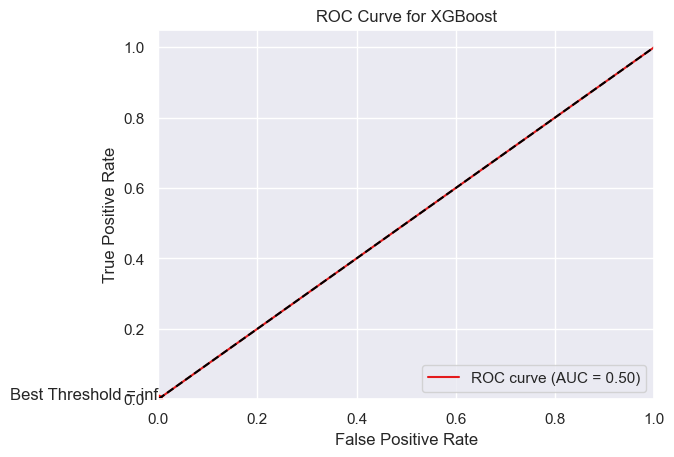

La courbe ROC illustre la capacité du modèle à discriminer entre les classes positives et négatives à différents seuils. L'AUC (Area Under Curve) mesure l'intégralité de la courbe ROC; une valeur proche de 1 indique une performance élevée du modèle, tandis qu'une valeur proche de 0.5 suggère une absence de capacité discriminatoire. Le seuil optimal, marqué sur la courbe, maximise la différence entre les taux de vrais positifs et de faux positifs, offrant ainsi un compromis entre sensibilité et spécificité.
Classification Report at Optimal Threshold:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      5652
         1.0       0.00      0.00      0.00       499

    accuracy                           0.92      6151
   macro avg       0.46      0.50      0.48      6151
weighted avg       0.84      0.92      0.88      6151

F-beta score (beta=2) at Optimal Threshold: 0.0
Optimal Threshold: inf
Confusion Matrix at Optimal Threshold:
[[5652 

/Users/laureagrech/oc7_venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/laureagrech/oc7_venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/laureagrech/oc7_venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

In [88]:
# Calculer les probabilités de prédiction
y_pred_proba = y_pred_proba_optimized  # ou y_pred_proba_non_optimized pour comparer

# Afficher la courbe ROC et obtenir le seuil optimal
auc_score, optimal_threshold = compute_roc_curve_with_best_threshold(y_test, y_pred_proba, model_name='XGBoost')

# Utiliser le seuil optimal pour prédire les classes
xgbc_pred_optimal = y_pred_proba >= optimal_threshold

# Calculer et afficher le rapport de classification pour le seuil optimal
print("Classification Report at Optimal Threshold:")
print(classification_report(y_test, xgbc_pred_optimal))

# Calculer le F-beta score à la place du business score
fbeta = fbeta_score(y_test, xgbc_pred_optimal, beta=2)
print(f"F-beta score (beta=2) at Optimal Threshold: {fbeta}")
print(f"Optimal Threshold: {optimal_threshold}")

# Afficher la matrice de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, xgbc_pred_optimal)
print("Confusion Matrix at Optimal Threshold:")
print(cm)


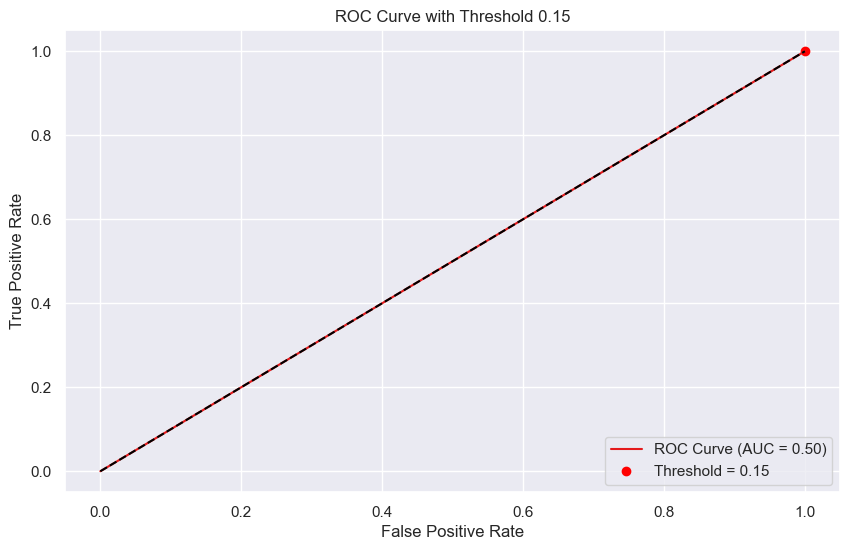


=== Résultats pour le seuil = 0.15 ===
Matrice de confusion pour Threshold = 0.15 :
TN (True Negatives): 0
FP (False Positives): 5652
FN (False Negatives): 0
TP (True Positives): 499


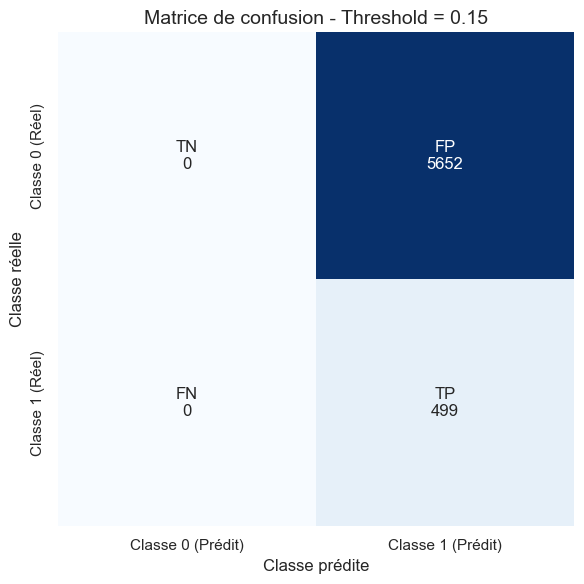

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      5652
         1.0       0.08      1.00      0.15       499

    accuracy                           0.08      6151
   macro avg       0.04      0.50      0.08      6151
weighted avg       0.01      0.08      0.01      6151

F-beta Score (beta=2) = 0.3062


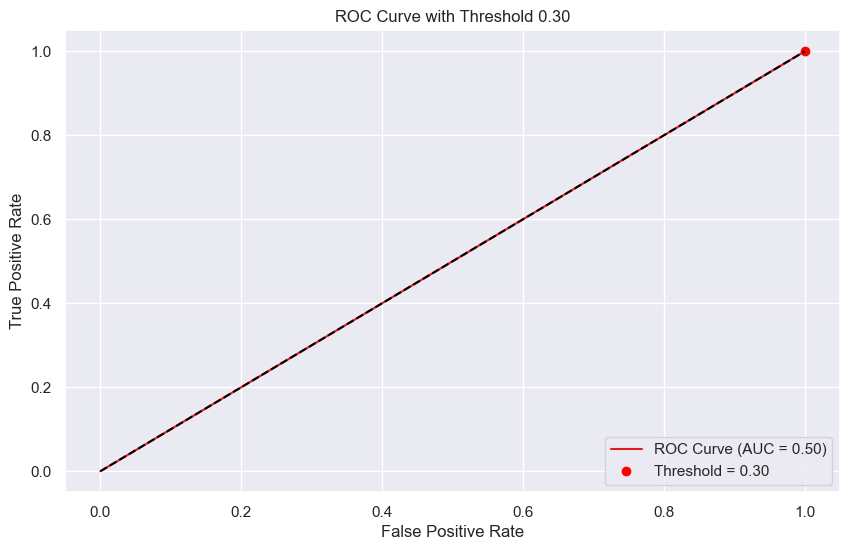


=== Résultats pour le seuil = 0.30 ===
Matrice de confusion pour Threshold = 0.30 :
TN (True Negatives): 0
FP (False Positives): 5652
FN (False Negatives): 0
TP (True Positives): 499


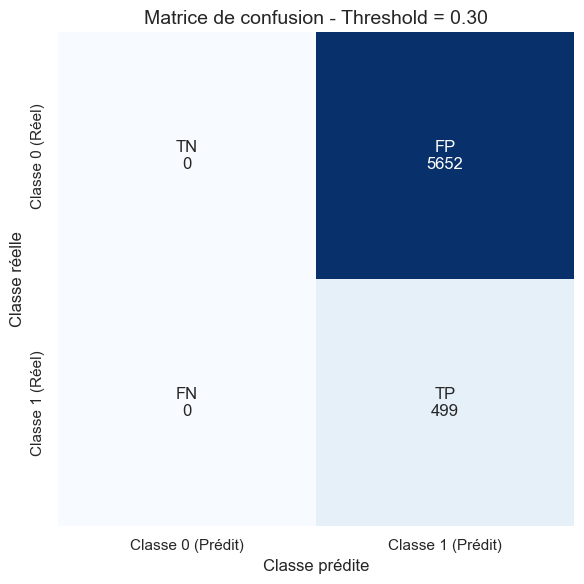

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      5652
         1.0       0.08      1.00      0.15       499

    accuracy                           0.08      6151
   macro avg       0.04      0.50      0.08      6151
weighted avg       0.01      0.08      0.01      6151

F-beta Score (beta=2) = 0.3062


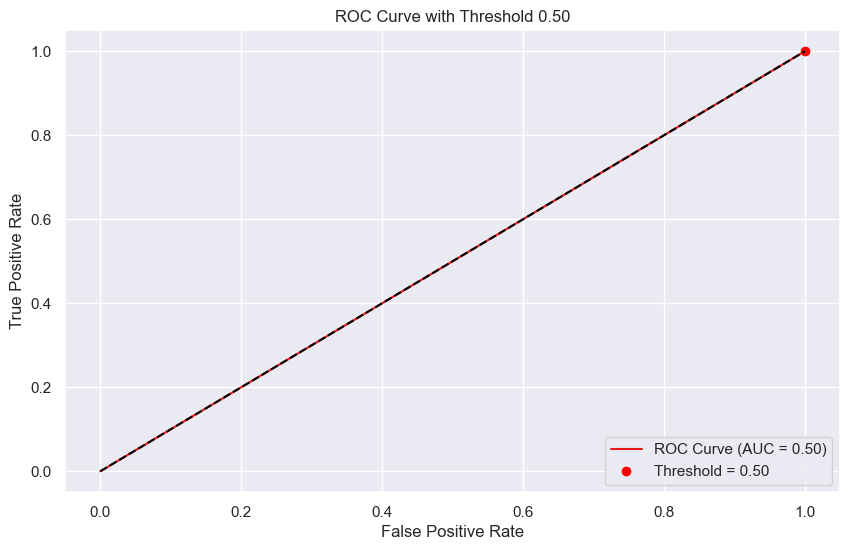


=== Résultats pour le seuil = 0.50 ===
Matrice de confusion pour Threshold = 0.50 :
TN (True Negatives): 0
FP (False Positives): 5652
FN (False Negatives): 0
TP (True Positives): 499


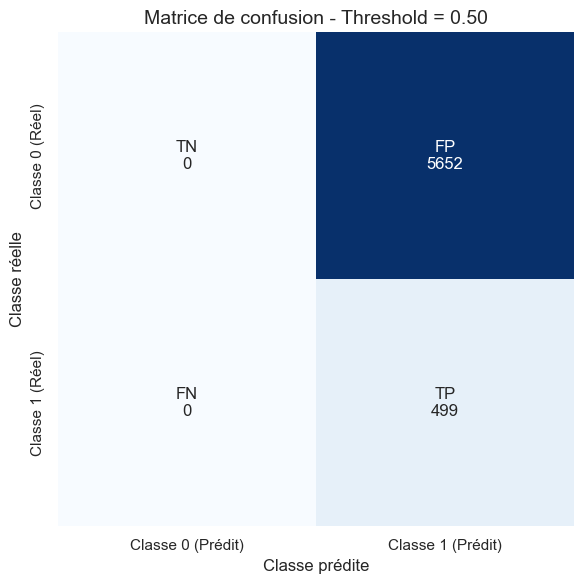

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      5652
         1.0       0.08      1.00      0.15       499

    accuracy                           0.08      6151
   macro avg       0.04      0.50      0.08      6151
weighted avg       0.01      0.08      0.01      6151

F-beta Score (beta=2) = 0.3062


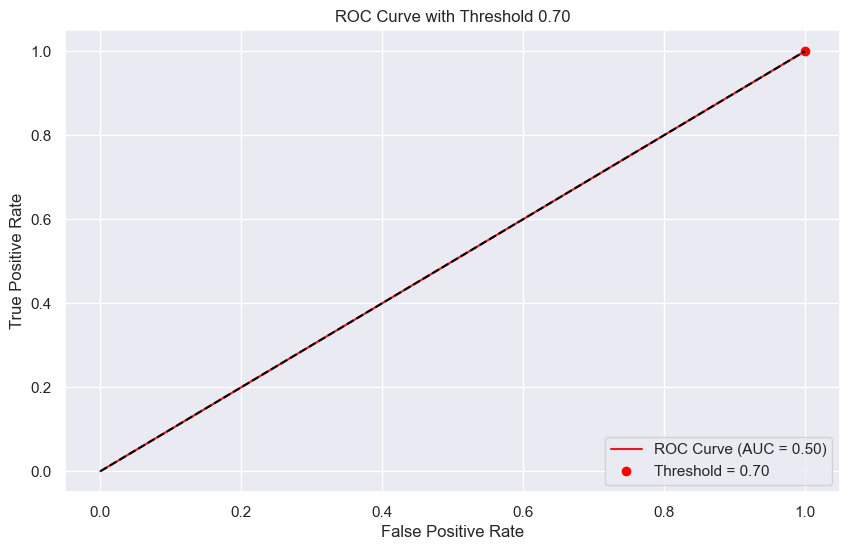


=== Résultats pour le seuil = 0.70 ===
Matrice de confusion pour Threshold = 0.70 :
TN (True Negatives): 5652
FP (False Positives): 0
FN (False Negatives): 499
TP (True Positives): 0


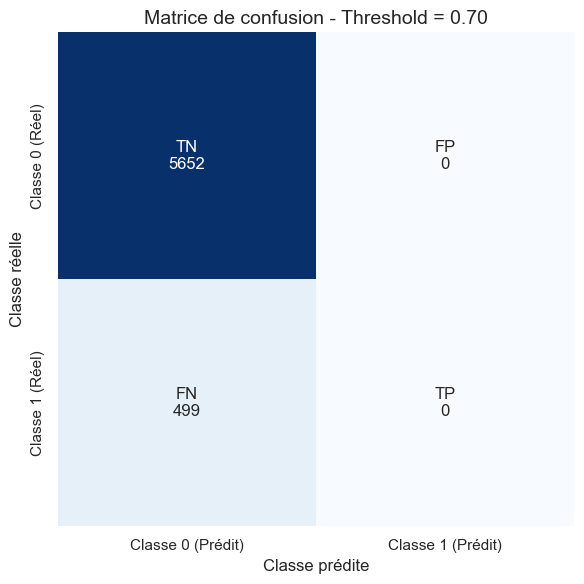

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      5652
         1.0       0.00      0.00      0.00       499

    accuracy                           0.92      6151
   macro avg       0.46      0.50      0.48      6151
weighted avg       0.84      0.92      0.88      6151

F-beta Score (beta=2) = 0.0000


In [89]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, fbeta_score

# Fonction pour afficher la courbe ROC avec plusieurs seuils et matrices de confusion
def plot_roc_curve_and_confusion_matrices(y_test, y_pred_proba, thresholds=[0.15, 0.3, 0.5, 0.7], beta=2):
    """
    Affiche une courbe ROC et une matrice de confusion pour chaque seuil.

    Parameters:
    - y_test: vraies étiquettes.
    - y_pred_proba: probabilités prédites de la classe positive.
    - thresholds: liste des seuils à tester.
    - beta: valeur de beta pour calculer le F-beta score.
    """
    # Calcule la courbe ROC 
    fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)

    # Pour chaque seuil, affiche une courbe ROC avec le point marqué
    for threshold in thresholds:
        plt.figure(figsize=(10, 6))

        # Trace la courbe ROC
        plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
        
        # Trouve l'index correspondant au seuil
        idx = np.argmin(np.abs(roc_thresholds - threshold))
        plt.scatter(fpr[idx], tpr[idx], marker='o', color='red', label=f'Threshold = {threshold:.2f}')

        # Ajoute des légendes et titres
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve with Threshold {threshold:.2f}')
        plt.legend(loc='lower right')

        plt.show()

        # Prédit les classes selon le seuil
        y_pred_threshold = (y_pred_proba >= threshold).astype(int)

        # Affiche la matrice de confusion
        print(f"\n=== Résultats pour le seuil = {threshold:.2f} ===")
        display_confusion_matrix(y_test, y_pred_threshold, model_name=f"Threshold = {threshold:.2f}")

        # Affiche le rapport de classification
        report = classification_report(y_test, y_pred_threshold, zero_division=0)
        print("Classification Report:")
        print(report)

        # Calcule le F-beta score
        fbeta = fbeta_score(y_test, y_pred_threshold, beta=beta, zero_division=0)
        print(f"F-beta Score (beta={beta}) = {fbeta:.4f}")


plot_roc_curve_and_confusion_matrices(y_test, y_pred_proba, thresholds=[0.15, 0.3, 0.5, 0.7], beta=2)


# Best Model including hyperparametization and custom threshold

the goal of tuning an XGBoost model with hyperparameter optimization and implementing a custom threshold for classification, 
The revised function will handle hyperparameter optimization using Hyperopt, compute the best
threshold for maximizing the F-beta score, and prepare the model for integration into an API that predicts the probability of belonging to class 1 or 0.

In [90]:

"""
# Fonction pour optimiser et entraîner le modèle avec XGBoost
def optimize_xgb(data, target_name='TARGET', train_size=0.8, random_state=42, beta=2, max_evals=10, threshold=0.4650724232196808):
    target = data[target_name].to_numpy()
    features = data.drop(columns=[target_name]).to_numpy()
    
    # Split des données
    x_train, x_test, y_train, y_test = train_test_split(features, target, train_size=train_size, random_state=random_state)

    # Pipeline de prétraitement (ceci est commun pour entraînement et prédiction)
    preprocess_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
    ])
    
    x_train_prepared = preprocess_pipeline.fit_transform(x_train)
    x_test_prepared = preprocess_pipeline.transform(x_test)

    # Rééquilibrage uniquement sur les données d'entraînement
    smote = SMOTE(sampling_strategy=0.5, random_state=random_state)
    undersample = RandomUnderSampler(sampling_strategy=1, random_state=random_state)
    
    x_train_resampled, y_train_resampled = smote.fit_resample(x_train_prepared, y_train)
    x_train_resampled, y_train_resampled = undersample.fit_resample(x_train_resampled, y_train_resampled)

    # Espace des hyperparamètres pour XGBoost
    xgb_space = {
        'max_depth': hp.choice('max_depth', range(3, 10)),
        'subsample': hp.uniform('subsample', 0.5, 1.0),
        'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0),
        'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
        'n_estimators': hp.choice('n_estimators', range(50, 301, 50)),
        'min_child_weight': hp.choice('min_child_weight', range(1, 6))
    }

    # Fonction objectif pour Hyperopt
    def objective(params):
        model = xgb.XGBClassifier(**params, random_state=random_state, eval_metric='logloss')
        fbeta_scorer = make_scorer(fbeta_score, beta=beta)
        score = cross_val_score(model, x_train_resampled, y_train_resampled, cv=5, scoring=fbeta_scorer).mean()
        return {'loss': -score, 'status': STATUS_OK}

    try:
        mlflow.start_run()

        # Optimisation des hyperparamètres
        trials = Trials()
        best = fmin(fn=objective, space=xgb_space, algo=tpe.suggest, max_evals=max_evals, trials=trials)
        best_params = {param: trials.best_trial['misc']['vals'][param][0] for param in xgb_space.keys()}
        
        # Entraînement du modèle optimisé avec les meilleurs hyperparamètres
        best_model = xgb.XGBClassifier(**best_params, random_state=random_state, eval_metric='logloss')
        best_model.fit(x_train_resampled, y_train_resampled)

        # Création du pipeline complet (sans rééquilibrage pour la prédiction)
        full_pipeline = Pipeline(steps=[
            ('preprocessing', preprocess_pipeline),  # Inclut l'imputation et la normalisation
            ('model', best_model)  # Modèle optimisé
        ])

        # Sauvegarder le pipeline complet
        model_path = "../models/xgb_pipeline_tuned.pkl"
        joblib.dump(full_pipeline, model_path)

        # Prédictions de probabilités sur le jeu de test
        y_pred_proba_optimized = best_model.predict_proba(x_test_prepared)[:, 1]

        # Prédictions binaires en utilisant le threshold fixe
        y_pred_optimized = (y_pred_proba_optimized >= threshold).astype(int)

        # Calcul du F-beta score avec le threshold
        final_fbeta_optimized = fbeta_score(y_test, y_pred_optimized, beta=beta)
        clf_report_optimized = classification_report(y_test, y_pred_optimized, output_dict=True)

        # Enregistrer le modèle et les métriques dans MLflow
        mlflow.log_artifact(model_path)
        mlflow.log_metric("final_fbeta_optimized", final_fbeta_optimized)

        print(f"Optimized model F-beta (beta={beta}, threshold={threshold}): {final_fbeta_optimized}")
    
    finally:
        mlflow.end_run()

    # Retourner les données nécessaires
    return (full_pipeline, final_fbeta_optimized, best_params, clf_report_optimized, 
            y_pred_proba_optimized, y_test, x_train_resampled, x_test_prepared, x_train_prepared, y_pred_optimized)


# Appel de la fonction avec les données et récupération de tous les paramètres
(full_pipeline, final_fbeta_optimized, best_hyperparams, clf_report_optimized, 
 y_pred_proba_optimized, y_test, x_train_resampled, x_test_prepared, x_train_prepared, y_pred_optimized) = optimize_xgb(data)


# Affichage des résultats
print("=== Optimized Model Classification Report ===")
print(clf_report_optimized)"""

'\n# Fonction pour optimiser et entraîner le modèle avec XGBoost\ndef optimize_xgb(data, target_name=\'TARGET\', train_size=0.8, random_state=42, beta=2, max_evals=10, threshold=0.4650724232196808):\n    target = data[target_name].to_numpy()\n    features = data.drop(columns=[target_name]).to_numpy()\n    \n    # Split des données\n    x_train, x_test, y_train, y_test = train_test_split(features, target, train_size=train_size, random_state=random_state)\n\n    # Pipeline de prétraitement (ceci est commun pour entraînement et prédiction)\n    preprocess_pipeline = Pipeline([\n        (\'imputer\', SimpleImputer(strategy=\'mean\')),\n        (\'scaler\', StandardScaler()),\n    ])\n    \n    x_train_prepared = preprocess_pipeline.fit_transform(x_train)\n    x_test_prepared = preprocess_pipeline.transform(x_test)\n\n    # Rééquilibrage uniquement sur les données d\'entraînement\n    smote = SMOTE(sampling_strategy=0.5, random_state=random_state)\n    undersample = RandomUnderSampler(sampl

In [91]:
import os
import mlflow
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import make_scorer, fbeta_score, classification_report
import xgboost as xgb
import joblib
import numpy as np
# Fonction pour optimiser et entraîner le modèle avec XGBoost
# Ajout du threshold dans le pipeline pour le récupérer plus tard
class CustomThreshold:
    def __init__(self, model, threshold=0.4650724232196808):
        self.model = model
        self.threshold = threshold

    def predict_proba(self, X):
        return self.model.predict_proba(X)

    def predict(self, X):
        proba = self.predict_proba(X)[:, 1]
        return (proba >= self.threshold).astype(int)

    def get_threshold(self):
        return self.threshold

def optimize_xgb(data, target_name='TARGET', train_size=0.8, random_state=42, beta=2, max_evals=10, threshold=0.4650724232196808):
    target = data[target_name].to_numpy()
    features = data.drop(columns=[target_name]).to_numpy()
    
    # Split des données
    x_train, x_test, y_train, y_test = train_test_split(features, target, train_size=train_size, random_state=random_state)

    # Pipeline de prétraitement (ceci est commun pour entraînement et prédiction)
    preprocess_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
    ])
    
    x_train_prepared = preprocess_pipeline.fit_transform(x_train)
    x_test_prepared = preprocess_pipeline.transform(x_test)

    # Rééquilibrage uniquement sur les données d'entraînement
    smote = SMOTE(sampling_strategy=0.5, random_state=random_state)
    undersample = RandomUnderSampler(sampling_strategy=1, random_state=random_state)
    
    x_train_resampled, y_train_resampled = smote.fit_resample(x_train_prepared, y_train)
    x_train_resampled, y_train_resampled = undersample.fit_resample(x_train_resampled, y_train_resampled)

    # Espace des hyperparamètres pour XGBoost
    xgb_space = {
        'max_depth': hp.choice('max_depth', range(3, 10)),
        'subsample': hp.uniform('subsample', 0.5, 1.0),
        'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0),
        'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
        'n_estimators': hp.choice('n_estimators', range(50, 301, 50)),
        'min_child_weight': hp.choice('min_child_weight', range(1, 6))
    }

    # Fonction objectif pour Hyperopt
    def objective(params):
        model = xgb.XGBClassifier(**params, random_state=random_state, eval_metric='logloss')
        fbeta_scorer = make_scorer(fbeta_score, beta=beta)
        score = cross_val_score(model, x_train_resampled, y_train_resampled, cv=5, scoring=fbeta_scorer).mean()
        return {'loss': -score, 'status': STATUS_OK}

    try:
        mlflow.start_run()

        # Optimisation des hyperparamètres
        trials = Trials()
        best = fmin(fn=objective, space=xgb_space, algo=tpe.suggest, max_evals=max_evals, trials=trials)
        best_params = {param: trials.best_trial['misc']['vals'][param][0] for param in xgb_space.keys()}
        
        # Entraînement du modèle optimisé avec les meilleurs hyperparamètres
        best_model = xgb.XGBClassifier(**best_params, random_state=random_state, eval_metric='logloss')
        best_model.fit(x_train_resampled, y_train_resampled)

        # Création du pipeline complet (sans rééquilibrage pour la prédiction)
        full_pipeline = Pipeline(steps=[
            ('preprocessing', preprocess_pipeline),  # Inclut l'imputation et la normalisation
            ('model', best_model)  # Modèle optimisé
        ])

        # Sauvegarder le pipeline complet
        model_path = "../models/xgb_pipeline_tuned.pkl"
        joblib.dump(full_pipeline, model_path)

        # Prédictions de probabilités sur le jeu de test
        y_pred_proba_optimized = best_model.predict_proba(x_test_prepared)[:, 1]

        # Prédictions binaires en utilisant le threshold fixe
        y_pred_optimized = (y_pred_proba_optimized >= threshold).astype(int)

        # Calcul du F-beta score avec le threshold
        final_fbeta_optimized = fbeta_score(y_test, y_pred_optimized, beta=beta)
        clf_report_optimized = classification_report(y_test, y_pred_optimized, output_dict=True)

        # Enregistrer le modèle et les métriques dans MLflow
        mlflow.log_artifact(model_path)
        mlflow.log_metric("final_fbeta_optimized", final_fbeta_optimized)

        print(f"Optimized model F-beta (beta={beta}, threshold={threshold}): {final_fbeta_optimized}")
    
    finally:
        mlflow.end_run()

    # Retourner les données nécessaires + best_model explicitement
    return (full_pipeline, best_model, final_fbeta_optimized, best_params, clf_report_optimized, 
            y_pred_proba_optimized, y_test, x_train_resampled, x_test_prepared, x_train_prepared, y_pred_optimized)


# Appel de la fonction avec les données et récupération de tous les paramètres
(full_pipeline, best_model, final_fbeta_optimized, best_hyperparams, clf_report_optimized, 
 y_pred_proba_optimized, y_test, x_train_resampled, x_test_prepared, x_train_prepared, y_pred_optimized) = optimize_xgb(data)


# Affichage des résultats
print("=== Optimized Model Classification Report ===")
print(clf_report_optimized)


100%|██████████| 10/10 [02:47<00:00, 16.74s/trial, best loss: -0.8190037037695153]


/Users/laureagrech/oc7_venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/laureagrech/oc7_venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/laureagrech/oc7_venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Optimized model F-beta (beta=2, threshold=0.4650724232196808): 0.30624769853933964
=== Optimized Model Classification Report ===
{'0.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 5652.0}, '1.0': {'precision': 0.08112502032189887, 'recall': 1.0, 'f1-score': 0.1500751879699248, 'support': 499.0}, 'accuracy': 0.08112502032189887, 'macro avg': {'precision': 0.04056251016094944, 'recall': 0.5, 'f1-score': 0.0750375939849624, 'support': 6151.0}, 'weighted avg': {'precision': 0.006581268922228506, 'recall': 0.08112502032189887, 'f1-score': 0.012174852673872945, 'support': 6151.0}}


# Feature importance

LIME et SHAP : 

Les prédictions d’un échantillon sont expliquées à l’aide de LIME, 

et SHAP fournit les contributions de chaque feature pour toutes les observations

## LIME

In [92]:

# LIME
features_names = data.columns.drop('TARGET')
lime_explainer = lime_tabular.LimeTabularExplainer(x_test_prepared, mode="classification",
                                                   class_names=['REPAY SUCCESS', 'REPAY FAILURE'],
                                                   feature_names=features_names)

valid_idx = len(x_test_prepared) - 1  # Dernier index
explanation = lime_explainer.explain_instance(x_test_prepared[valid_idx], full_pipeline.predict_proba)
explanation.show_in_notebook()


In [93]:
# Importation de la librairie lime
from lime import lime_tabular

# Création de l'explicateur LIME
lime_explainer = lime_tabular.LimeTabularExplainer(
    x_test_prepared, 
    mode="classification",
    class_names=['REPAY SUCCESS', 'REPAY FAILURE'],
    feature_names=data.columns.drop('TARGET'),  
    discretize_continuous=True
)

# Fixer l'index à un indice valide dans x_test
valid_idx = len(x_test) - 1  # Dernier index valide, par exemple

# Affichage de la prédiction et du résultat réel pour cet index
print("Prediction : ", best_model.predict(x_test_prepared)[valid_idx])
print("Actual :     ", y_test[valid_idx])

# Explication de la prédiction avec LIME
explanation = lime_explainer.explain_instance(x_test_prepared[valid_idx], best_model.predict_proba)

# Afficher l'explication dans le notebook
explanation.show_in_notebook()

# Afficher l'explication sous forme de liste
print(explanation.as_list())


Prediction :  0
Actual :      0.0


[('EXT_SOURCE_2 > 0.80', -0.013077563319938233), ('ORGANIZATION_TYPE_Industry: type 6 <= -0.02', 0.00828793808875499), ('-0.00 < EXT_SOURCE_3 <= 0.68', -0.007876262477004728), ('FLAG_DOCUMENT_15 <= -0.03', 0.00772627111766011), ('ORGANIZATION_TYPE_Trade: type 5 <= -0.01', -0.007720956535185304), ('ORGANIZATION_TYPE_Industry: type 10 <= -0.02', 0.007639057846533085), ('FLAG_DOCUMENT_19 <= -0.02', -0.006805117904139866), ('ORGANIZATION_TYPE_Industry: type 1 <= -0.06', 0.006519955183982409), ('ORGANIZATION_TYPE_Culture <= -0.03', -0.005069608343013519), ('FLAG_DOCUMENT_17 <= -0.01', -0.003003586456044702)]


## SHAP

In [94]:
import shap
import joblib

Comprendre les Modèles Non Linéaires et les Poids des Variables
Modèles Linéaires (comme la régression linéaire ou la régression logistique) :


Les variables ont des coefficients fixes (poids) qui multiplient les valeurs des variables pour produire une prédiction.
Impact Constant : Le poids d'une variable est le même pour toutes les prédictions, donc son impact est constant.
Modèles Non Linéaires (comme les arbres de décision, XGBoost, réseaux de neurones) :


Les relations entre les variables et la prédiction sont complexes et non linéaires.
Pas de Poids Fixes : Les variables n'ont pas de coefficients fixes ; leur impact sur la prédiction dépend des valeurs des autres variables.
Interactions Variables : Les modèles peuvent capturer des interactions complexes entre les variables.

Importance des Variables Variable selon le Client

Contribution Variable :

Dans les modèles non linéaires, la contribution d'une variable à la prédiction peut varier pour chaque client en fonction de ses caractéristiques spécifiques.

Exemple :
Pour un client avec un revenu élevé, la variable "historique de crédit" peut avoir plus d'impact.
Pour un client avec un revenu faible, la variable "revenu" peut être plus déterminante."""

Ce qui est déterminant pour un individu n'est pas nécessairement ce qui l'est pour la population entière.

1. Contribution Locale :
Force Plot : Visualise l'impact de chaque variable sur la prédiction d'un client spécifique.
Waterfall Plot : Montre comment les contributions individuelles des variables s'accumulent pour aboutir à la prédiction finale.

2. Importance Globale :
Summary Plot : Présente l'importance moyenne des variables sur l'ensemble des clients.
Feature Importance Plot : Classe les variables en fonction de leur importance globale.

In [95]:
#vue d'ensemble de l'influence globale des features sur toutes les instances du dataset 

On choisit les variables x_train_prepared et y_test_prepared du modèle les informations SHAP car elles sont calculées sur des données qui reflètent la distribution réelle des données, c'est-à-dire sans suréchantillonnage ou sous-échantillonnage.

# Feature importances

best_model.feature_importances_ calcule l'importance des features en fonction de la fréquence d'utilisation de chaque feature dans les arbres de décision (généralement basé sur le gain ou le poids de chaque feature dans le modèle).

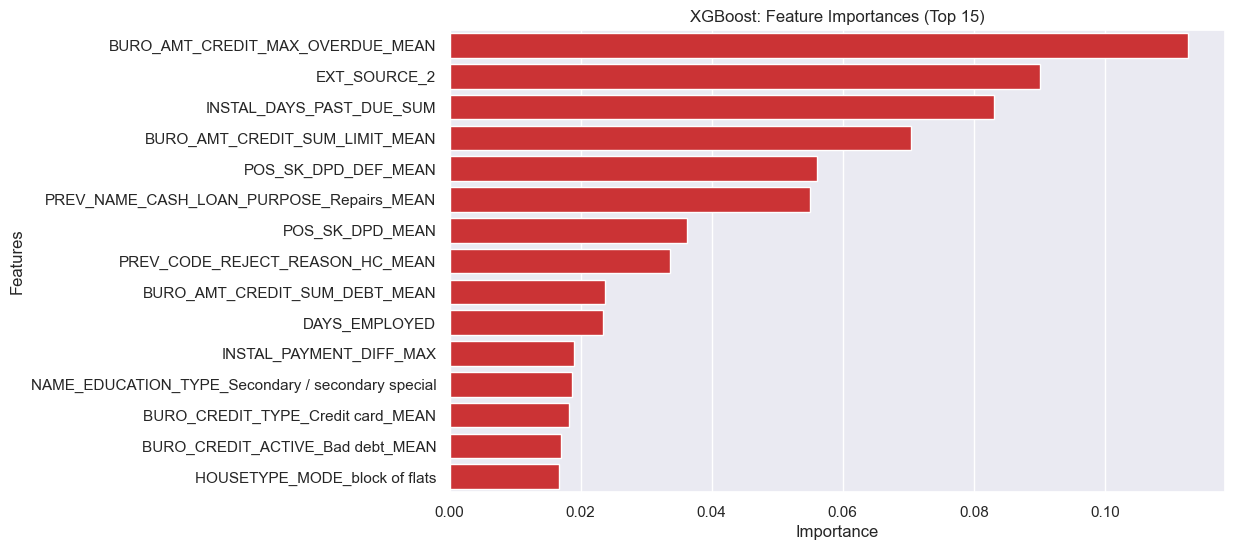

In [96]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assurez-vous d'avoir les noms de vos features avant le prétraitement
features_names = data.drop(columns=['TARGET']).columns

# Obtenir les importances des features de XGBoost
importances = full_pipeline.named_steps['model'].feature_importances_  # Récupérer les importances des features depuis XGBoost
sorted_idx = np.argsort(importances)[::-1]  # Tri décroissant des indices d'importance

# Limiter aux 15 premières features
top_15_idx = sorted_idx[:15]

# Afficher le graphique des importances des features
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[top_15_idx], y=np.array(features_names)[top_15_idx])
plt.title("XGBoost: Feature Importances (Top 15)")
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


### SHAP contribution globale

In [97]:
# Initialiser l'explainer avec le modèle entraîné
explainer = shap.TreeExplainer(best_model)

In [98]:
# Utiliser un échantillon de x_train_prepared comme données de fond
background = x_train_prepared[np.random.choice(x_train_prepared.shape[0], 100, replace=False)]
explainer = shap.TreeExplainer(best_model, data=background)

#### Summary Plot Shap

In [99]:
# Calculer les valeurs SHAP pour les données d'entraînement
shap_values_train = explainer.shap_values(x_train_prepared)
shap_values_test = explainer.shap_values(x_test_prepared)

#### Feature Importance Plot :

/var/folders/t0/bk4v248j27n4pms6k42stgrm0000gn/T/ipykernel_29770/2840200431.py:25: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


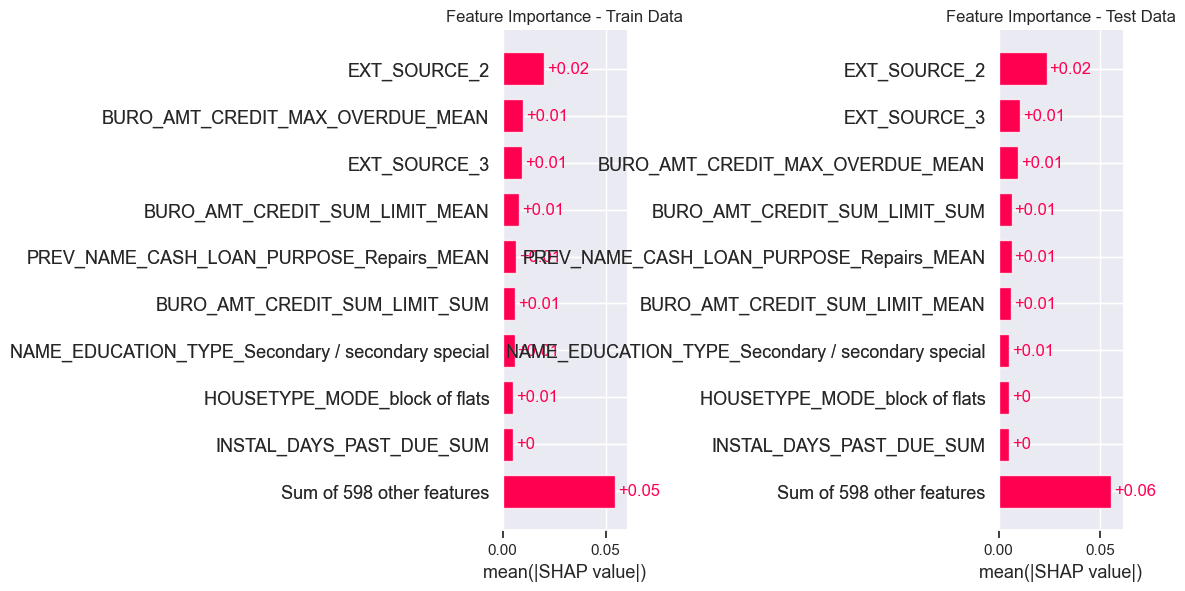

In [100]:
import shap
import matplotlib.pyplot as plt

# Créer l'explainer SHAP avec les noms des features
shap_explainer = shap.Explainer(best_model, x_train_resampled, feature_names=features_names)

# Calculer les valeurs SHAP pour les données d'entraînement et de test
shap_values_train = shap_explainer(x_train_resampled)
shap_values_test = shap_explainer(x_test_prepared)

# Création d'une figure avec deux sous-graphiques côte à côte
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 ligne, 2 colonnes

# Affichage du bar plot pour les données d'entraînement
plt.sca(axes[0])  # Active le premier sous-graphique
shap.plots.bar(shap_values_train, show=False)
plt.title('Feature Importance - Train Data')

# Affichage du bar plot pour les données de test
plt.sca(axes[1])  # Active le deuxième sous-graphique
shap.plots.bar(shap_values_test, show=False)
plt.title('Feature Importance - Test Data')

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()
plt.subplots_adjust(wspace=3)  # wspace contrôle l'espace entre les graphiques

# Affichage de la figure avec les deux sous-graphiques
plt.show()


#### Shap Beeswarm Plot

In [101]:
import pandas as pd
import numpy as np

# Récupérer les noms des variables
feature_names = data.drop(columns=["TARGET"]).columns.tolist()

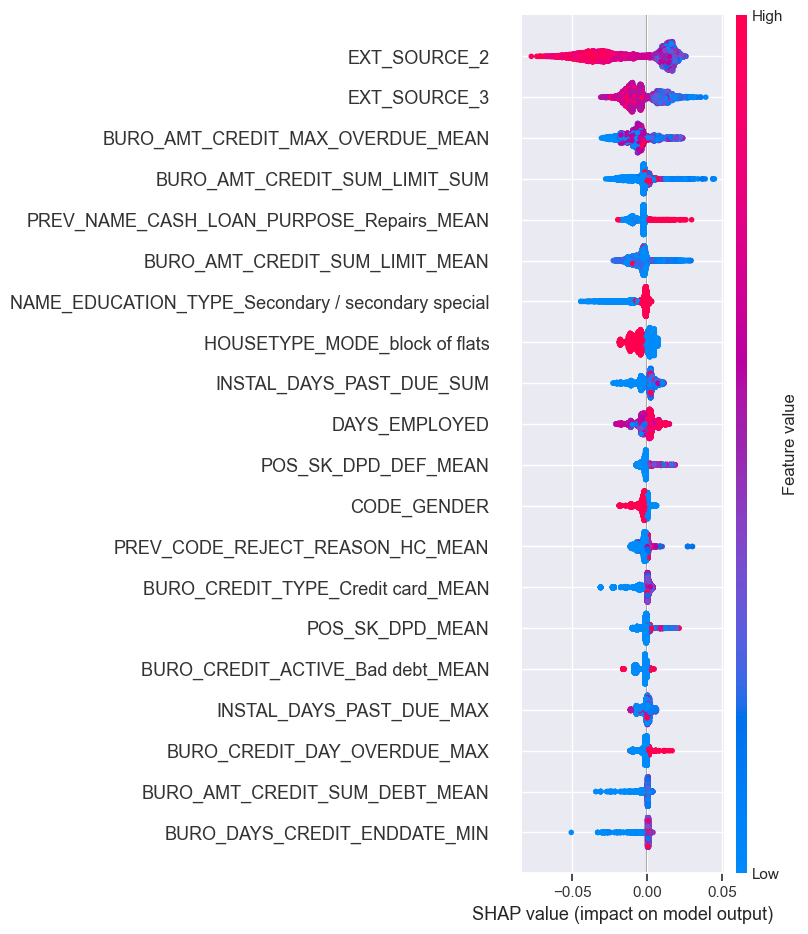

In [102]:
# Beeswarm plot
shap.summary_plot(shap_values_test, x_test_prepared, feature_names=feature_names)

In [103]:
# Initialiser le SHAP explainer avec le modèle
explainer = shap.TreeExplainer(best_model)

# Calculer les valeurs SHAP pour l'ensemble d'entraînement et de test
shap_values_train = explainer.shap_values(x_train_prepared)
shap_values_test = explainer.shap_values(x_test_prepared)

# Vérifier le type de shap_values_train
print("Type of shap_values_train:", type(shap_values_train))
print("Is shap_values_train a list?", isinstance(shap_values_train, list))

if isinstance(shap_values_train, list):
    # Sélectionner les valeurs pour la classe 1 (positive)
    shap_values_train = shap_values_train[1]
    shap_values_test = shap_values_test[1]
    print("Selected SHAP values for class 1")
else:
    print("Using SHAP values as is")

# Calcule les importances moyennes absolues
importances_train = np.abs(shap_values_train).mean(axis=0)
importances_test = np.abs(shap_values_test).mean(axis=0)

# Créer un DataFrame pour comparer
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance_Train': importances_train,
    'Importance_Test': importances_test
})

# Calculer la différence d'importance
importance_df['Difference'] = importance_df['Importance_Test'] - importance_df['Importance_Train']

# Trier les variables par différence d'importance
importance_df = importance_df.sort_values(by='Difference', ascending=False)

# Afficher les résultats
display(importance_df)


Type of shap_values_train: <class 'numpy.ndarray'>
Is shap_values_train a list? False
Using SHAP values as is


Feature  Importance_Train  \
242                      BURO_AMT_CREDIT_SUM_LIMIT_SUM          0.005211   
227                       BURO_DAYS_CREDIT_ENDDATE_MIN          0.001104   
347           PREV_NAME_CASH_LOAN_PURPOSE_Repairs_MEAN          0.005468   
246                        BURO_MONTHS_BALANCE_MAX_MAX          0.001065   
213                      HOUSETYPE_MODE_block of flats          0.004800   
..                                                 ...               ...   
233                   BURO_AMT_CREDIT_MAX_OVERDUE_MEAN          0.008928   
19                                          FLAG_PHONE          0.000786   
485                           INSTAL_DAYS_PAST_DUE_SUM          0.005617   
238                      BURO_AMT_CREDIT_SUM_DEBT_MEAN          0.001564   
114  NAME_EDUCATION_TYPE_Secondary / secondary special          0.004793   

     Importance_Test  Difference  
242         0.005336    0.000125  
227         0.001190    0.000086  
347         0.005536    0.000068  
246         0.001111    0.000045  
213         0.004839    0.000040  
..               ...         ...  
233         0.008888   -0.000040  
19          0.000745   -0.000041  
485         0.005575   -0.000043  
238         0.001460   -0.000104  
114         0.004640   -0.000154  

[607 rows x 4 columns]

### SHAP contribution locale

#### Waterfall plot

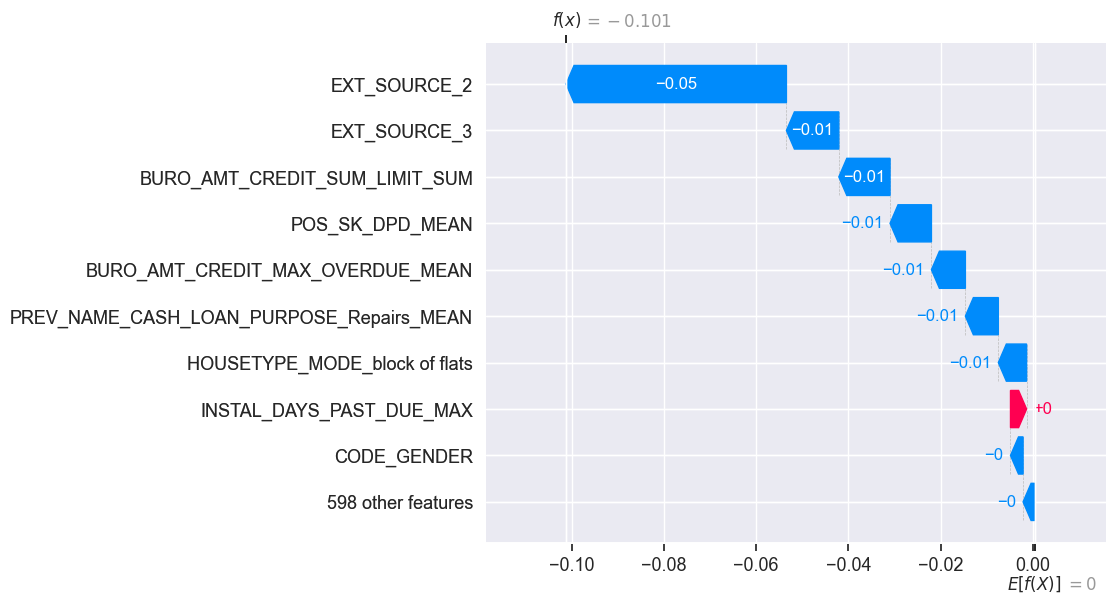

In [104]:
# Sélectionner le premier client de l'ensemble de test
client_index = 6150
client_data = x_test_prepared[client_index].reshape(1, -1)  # Assurez-vous que le tableau est en 2D

# Calculer les valeurs SHAP pour le client
client_shap_values = explainer.shap_values(client_data)

# Afficher le waterfall plot
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, client_shap_values[0], feature_names=feature_names)


#### Force plot

In [105]:
# Afficher le force plot
shap.initjs()
shap.force_plot(explainer.expected_value, client_shap_values, client_data, feature_names=feature_names)


Cela représente une métrique interne propre à l'algorithme XGBoost, qui est différente de la méthode SHAP.

I use the XGBoost feature_importances_ built in method to get the feature importance of the trained model.

# Export data for api and dashboard

In [106]:
import joblib

# Exporter le SHAP explainer
explainer_path = '../models/shap_explainer.pkl'
joblib.dump(shap_explainer, explainer_path)
print(f"SHAP explainer saved to {explainer_path}")


SHAP explainer saved to ../models/shap_explainer.pkl


# Test SHAP sur les nouvelles entrées

In [107]:
""" utile ?
from sklearn.base import BaseEstimator, ClassifierMixin

# Classe pour appliquer le threshold sur les probabilités
class ThresholdClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, model, threshold=0.45):
        self.model = model
        self.threshold = threshold

    def fit(self, X, y):
        self.model.fit(X, y)
        return self

    def predict(self, X):
        # Prédictions probabilistes
        y_proba = self.model.predict_proba(X)[:, 1]
        # Appliquer le threshold
        return (y_proba >= self.threshold).astype(int)

    def predict_proba(self, X):
        # Retourner les probabilités
        return self.model.predict_proba(X)"""


' utile ?\nfrom sklearn.base import BaseEstimator, ClassifierMixin\n\n# Classe pour appliquer le threshold sur les probabilités\nclass ThresholdClassifier(BaseEstimator, ClassifierMixin):\n    def __init__(self, model, threshold=0.45):\n        self.model = model\n        self.threshold = threshold\n\n    def fit(self, X, y):\n        self.model.fit(X, y)\n        return self\n\n    def predict(self, X):\n        # Prédictions probabilistes\n        y_proba = self.model.predict_proba(X)[:, 1]\n        # Appliquer le threshold\n        return (y_proba >= self.threshold).astype(int)\n\n    def predict_proba(self, X):\n        # Retourner les probabilités\n        return self.model.predict_proba(X)'

In [108]:
new_data = pd.read_csv("../data/processed/test_feature_engineering_sample.csv")
new_data.head()

SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0    218796.0                   0            1             0                0   
1    202006.0                   0            1             0                0   
2    123688.0                   0            1             0                0   
3    389440.0                   0            1             0                0   
4    166255.0                   0            1             0                0   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0             0          103500.0    280170.0      29547.0   
1             1          202500.0    383787.0      33070.5   
2             1          157500.0    440784.0      34956.0   
3             0           90000.0    189000.0      12757.5   
4             0          135000.0    450000.0      19197.0   

   REGION_POPULATION_RELATIVE  ...  CC_NAME_CONTRACT_STATUS_Signed_MIN  \
0                    0.018029  ...                                 NaN   
1                    0.018850  ...                                 NaN   
2                    0.002134  ...                                 NaN   
3                    0.015221  ...                               False   
4                    0.028663  ...                                 NaN   

   CC_NAME_CONTRACT_STATUS_Signed_MAX  CC_NAME_CONTRACT_STATUS_Signed_MEAN  \
0                                 NaN                                  NaN   
1                                 NaN                                  NaN   
2                                 NaN                                  NaN   
3                               False                                  0.0   
4                                 NaN                                  NaN   

   CC_NAME_CONTRACT_STATUS_Signed_SUM  CC_NAME_CONTRACT_STATUS_Signed_VAR  \
0                                 NaN                                 NaN   
1                                 NaN                                 NaN   
2                                 NaN                                 NaN   
3                                 0.0                                 0.0   
4                                 NaN                                 NaN   

   CC_NAME_CONTRACT_STATUS_nan_MIN  CC_NAME_CONTRACT_STATUS_nan_MAX  \
0                              NaN                              NaN   
1                              NaN                              NaN   
2                              NaN                              NaN   
3                            False                            False   
4                              NaN                              NaN   

   CC_NAME_CONTRACT_STATUS_nan_MEAN  CC_NAME_CONTRACT_STATUS_nan_SUM  \
0                               NaN                              NaN   
1                               NaN                              NaN   
2                               NaN                              NaN   
3                               0.0                              0.0   
4                               NaN                              NaN   

   CC_NAME_CONTRACT_STATUS_nan_VAR  
0                              NaN  
1                              NaN  
2                              NaN  
3                              0.0  
4                              NaN  

[5 rows x 607 columns]

In [109]:
import joblib

# Charger le pipeline complet (prétraitement + modèle)
loaded_pipeline = joblib.load("../models/xgb_pipeline_tuned.pkl")

# Supposons que "new_data" représente vos nouvelles données de test sans la colonne 'TARGET'
# Le pipeline prétraitera et prédira directement
y_pred_new = loaded_pipeline.predict(new_data)

print("Prédictions pour les nouvelles données : ", y_pred_new)


Prédictions pour les nouvelles données :  [0 0 0 ... 0 0 0]


/Users/laureagrech/oc7_venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


/Users/laureagrech/oc7_venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


SHAP Bar plot (global feature importance) for new data:


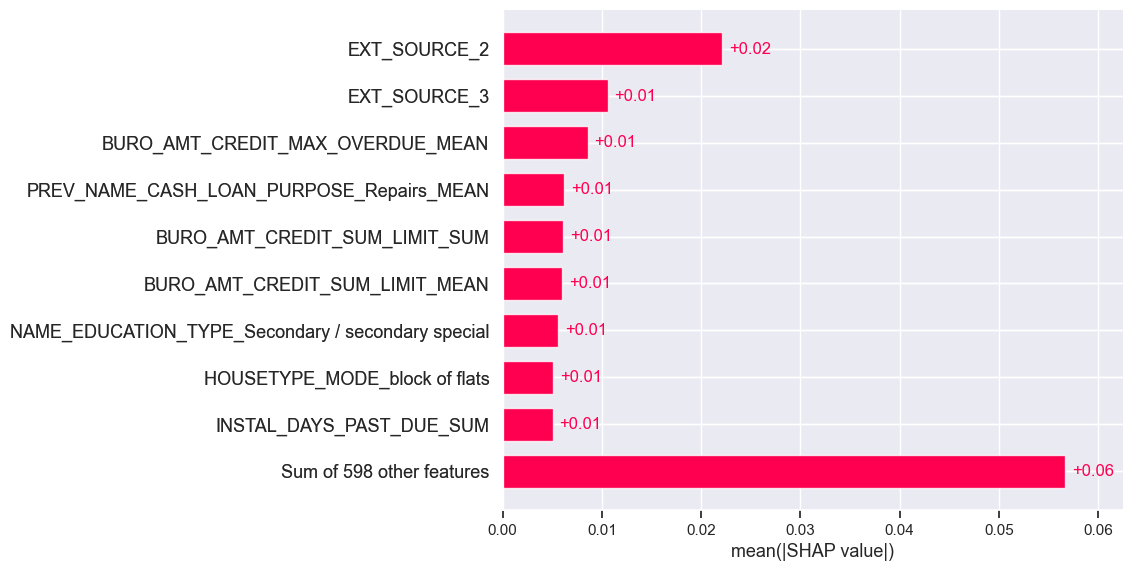

SHAP Waterfall plot for new data instance 4873:


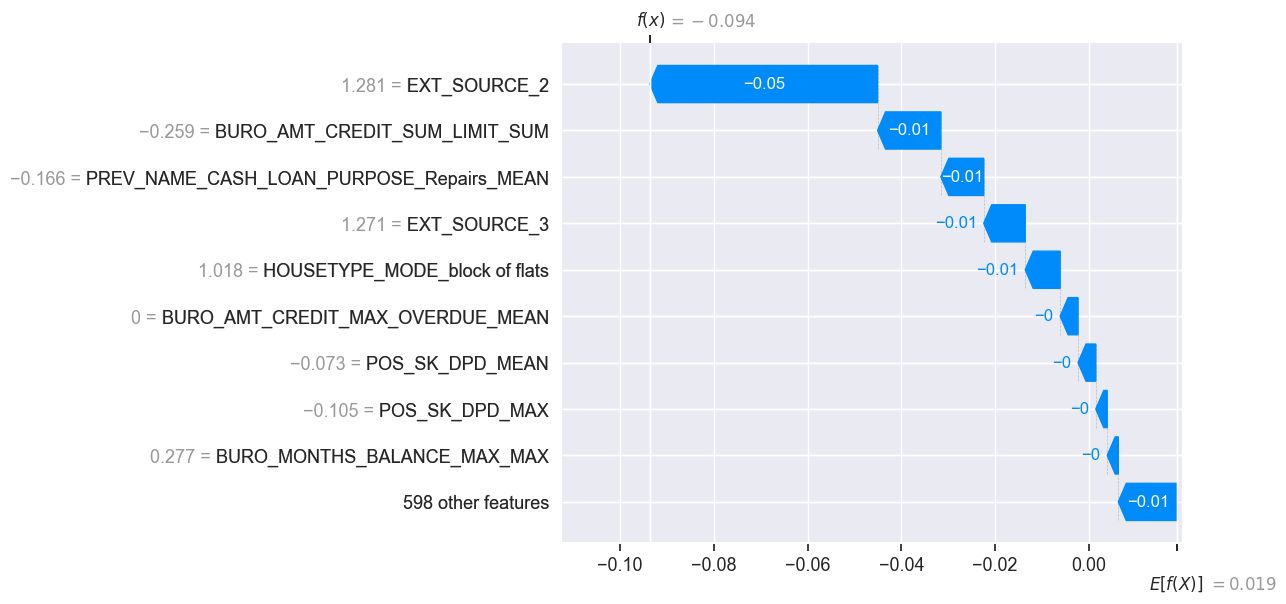

In [111]:
import joblib
import shap

# Chemin vers le fichier du pipeline complet
model_path = "../models/xgb_pipeline_tuned.pkl"
explainer_path = "../models/shap_explainer.pkl"

# Charger le pipeline complet (prétraitement + modèle)
loaded_pipeline = joblib.load(model_path)

# Charge le SHAP explainer sauvegardé
loaded_shap_explainer = joblib.load(explainer_path)

# "new_data" représente les nouvelles données de test
# On utilise le pipeline chargé pour prétraiter les nouvelles données
new_data_prepared = loaded_pipeline.named_steps['preprocessing'].transform(new_data)

# Calcul des valeurs SHAP pour les nouvelles données
shap_values_new_data = loaded_shap_explainer(new_data_prepared)

# Affichage des valeurs SHAP sous forme de graphique Bar pour les nouvelles données
print("SHAP Bar plot (global feature importance) for new data:")
shap.plots.bar(shap_values_new_data)

# Affichage des valeurs SHAP sous forme de graphique Waterfall pour une instance spécifique
valid_idx_new_data = len(new_data_prepared) - 1  # ici pour l'exemple on prend la dernière instance
print(f"SHAP Waterfall plot for new data instance {valid_idx_new_data}:")
shap.plots.waterfall(shap_values_new_data[valid_idx_new_data])


on fait des prédictions sur des données prétraitées mais non rééquilibrées.

I export the XGBoost default model (selected as best model)

I export the SHAP explainer based on the XGBoost default model.

In [113]:
import os
import mlflow
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import make_scorer, fbeta_score, classification_report
import xgboost as xgb
import joblib
import numpy as np

# Classe CustomThreshold pour sauvegarder le seuil
class CustomThreshold:
    def __init__(self, model, threshold=0.4650724232196808):
        self.model = model
        self.threshold = threshold

    def predict_proba(self, X):
        return self.model.predict_proba(X)

    def predict(self, X):
        proba = self.predict_proba(X)[:, 1]
        return (proba >= self.threshold).astype(int)

    def get_threshold(self):
        return self.threshold

# Fonction pour optimiser et entraîner le modèle avec XGBoost
def optimize_xgb(data, target_name='TARGET', train_size=0.8, random_state=42, beta=2, max_evals=10, threshold=0.4650724232196808):
    target = data[target_name].to_numpy()
    features = data.drop(columns=[target_name]).to_numpy()
    
    # Split des données
    x_train, x_test, y_train, y_test = train_test_split(features, target, train_size=train_size, random_state=random_state)

    # Pipeline de prétraitement (ceci est commun pour entraînement et prédiction)
    preprocess_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
    ])
    
    x_train_prepared = preprocess_pipeline.fit_transform(x_train)
    x_test_prepared = preprocess_pipeline.transform(x_test)

    # Rééquilibrage uniquement sur les données d'entraînement
    smote = SMOTE(sampling_strategy=0.5, random_state=random_state)
    undersample = RandomUnderSampler(sampling_strategy=1, random_state=random_state)
    
    x_train_resampled, y_train_resampled = smote.fit_resample(x_train_prepared, y_train)
    x_train_resampled, y_train_resampled = undersample.fit_resample(x_train_resampled, y_train_resampled)

    # Espace des hyperparamètres pour XGBoost
    xgb_space = {
        'max_depth': hp.choice('max_depth', range(3, 10)),
        'subsample': hp.uniform('subsample', 0.5, 1.0),
        'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0),
        'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
        'n_estimators': hp.choice('n_estimators', range(50, 301, 50)),
        'min_child_weight': hp.choice('min_child_weight', range(1, 6))
    }

    # Fonction objectif pour Hyperopt
    def objective(params):
        model = xgb.XGBClassifier(**params, random_state=random_state, eval_metric='logloss')
        fbeta_scorer = make_scorer(fbeta_score, beta=beta)
        score = cross_val_score(model, x_train_resampled, y_train_resampled, cv=5, scoring=fbeta_scorer).mean()
        return {'loss': -score, 'status': STATUS_OK}

    try:
        mlflow.start_run()

        # Optimisation des hyperparamètres
        trials = Trials()
        best = fmin(fn=objective, space=xgb_space, algo=tpe.suggest, max_evals=max_evals, trials=trials)
        best_params = {param: trials.best_trial['misc']['vals'][param][0] for param in xgb_space.keys()}
        
        # Entraînement du modèle optimisé avec les meilleurs hyperparamètres
        best_model = xgb.XGBClassifier(**best_params, random_state=random_state, eval_metric='logloss')
        best_model.fit(x_train_resampled, y_train_resampled)

        # Ajout du CustomThreshold au pipeline
        custom_model = CustomThreshold(best_model, threshold=threshold)

        # Création du pipeline complet (sans rééquilibrage pour la prédiction)
        full_pipeline = Pipeline(steps=[
            ('preprocessing', preprocess_pipeline),  # Inclut l'imputation et la normalisation
            ('model', custom_model)  # Modèle optimisé avec seuil
        ])

        # Sauvegarder le pipeline complet
        model_path = "../models/xgb_pipeline_tuned.pkl"
        joblib.dump(full_pipeline, model_path)

        # Prédictions de probabilités sur le jeu de test
        y_pred_proba_optimized = best_model.predict_proba(x_test_prepared)[:, 1]

        # Prédictions binaires en utilisant le threshold fixe
        y_pred_optimized = (y_pred_proba_optimized >= threshold).astype(int)

        # Calcul du F-beta score avec le threshold
        final_fbeta_optimized = fbeta_score(y_test, y_pred_optimized, beta=beta)
        clf_report_optimized = classification_report(y_test, y_pred_optimized, output_dict=True)

        # Enregistrer le modèle et les métriques dans MLflow
        mlflow.log_artifact(model_path)
        mlflow.log_metric("final_fbeta_optimized", final_fbeta_optimized)

        print(f"Optimized model F-beta (beta={beta}, threshold={threshold}): {final_fbeta_optimized}")
    
    finally:
        mlflow.end_run()

    # Retourner les données nécessaires + best_model explicitement
    return (full_pipeline, best_model, final_fbeta_optimized, best_params, clf_report_optimized, 
            y_pred_proba_optimized, y_test, x_train_resampled, x_test_prepared, x_train_prepared, y_pred_optimized)


# Appel de la fonction avec les données et récupération de tous les paramètres
(full_pipeline, best_model, final_fbeta_optimized, best_hyperparams, clf_report_optimized, 
 y_pred_proba_optimized, y_test, x_train_resampled, x_test_prepared, x_train_prepared, y_pred_optimized) = optimize_xgb(data)


# Affichage des résultats
print("=== Optimized Model Classification Report ===")
print(clf_report_optimized)


100%|██████████| 10/10 [03:21<00:00, 20.14s/trial, best loss: -0.8189852644214886]
Optimized model F-beta (beta=2, threshold=0.4650724232196808): 0.34430379746835443
=== Optimized Model Classification Report ===
{'0.0': {'precision': 0.959045904590459, 'recall': 0.377034677990092, 'f1-score': 0.5412750825501651, 'support': 5652.0}, '1.0': {'precision': 0.1038432171035887, 'recall': 0.8176352705410822, 'f1-score': 0.1842818428184282, 'support': 499.0}, 'accuracy': 0.4127784100146318, 'macro avg': {'precision': 0.5314445608470239, 'recall': 0.5973349742655871, 'f1-score': 0.36277846268429664, 'support': 6151.0}, 'weighted avg': {'precision': 0.8896675691887442, 'recall': 0.4127784100146318, 'f1-score': 0.5123139987221473, 'support': 6151.0}}


In [114]:
import shap

# Créer un explainer SHAP après l'entraînement du modèle
explainer = shap.TreeExplainer(best_model)

# Sauvegarder l'explainer SHAP
explainer_path = "../models/shap_explainer.pkl"
joblib.dump(explainer, explainer_path)
print(f"SHAP explainer saved to {explainer_path}")


SHAP explainer saved to ../models/shap_explainer.pkl


# Code api

In [ ]:
"""


Modèle qui retourne le best model xgboost, le shap explainer et le csv sample /Users/laureagrech/Desktop/OC7/data/processed/train_feature_engineering_sample.csv
L'api comprend :
 1/ une fonction qui prend en param un ID client et retourne la prédiction

  2/ une fonction qui prend un ID client et qui retourne les données du client

  3/ une fonction qui prend un ID et retournes les Shap values du client.



fais en sorte de créer un dashboard streamlit qui me permet à partir de l'api de sélectionner un utilisateur (id) du dataset sample et de retourner son score sous forme de jauge (rouge si score mauvais et vert si bon score et crédita accordé), le shap explainer des features de ce client par rapport au dataset ainsin que un deux graphiques sous forme de boxplot et barplot qui compare le client et une feature sélectionné par rapport à la moyenne des autres clients sur cette feature
Le dashboard permet donc de séléctionner un client et une variable avec 4 graphiques dont deux intéractifs où la variable est comparée

explique comment je peux déployer les 2 (l'api et le dashoboard) avec aws ec2

Explique chaque étape et tout le code ce qu’il permet d’afficher ainsi que la manière de faire marcher et l’api et le dashboard sur ans ou localement	


"""

In [ ]:
# Lancer l'API avec : uvicorn main:app --reload

In [ ]:
from fastapi import FastAPI, HTTPException
import joblib
import pandas as pd
import numpy as np

# Charger le pipeline complet (prétraitement + modèle)
pipeline_path = "../models/xgb_pipeline_tuned.pkl"
loaded_pipeline = joblib.load(pipeline_path)

# Charger l'explainer SHAP
explainer_path = "../models/shap_explainer.pkl"
loaded_shap_explainer = joblib.load(explainer_path)

# Créer l'API
app = FastAPI()

# Charger les données des clients
data_clients = pd.read_csv("../data/processed/test_feature_engineering_sample.csv")

# Assurez-vous que la colonne SK_ID_CURR est bien en float
data_clients['SK_ID_CURR'] = data_clients['SK_ID_CURR'].astype(float)

# Debugging: Vérifiez si les données sont bien chargées
print(f"Data loaded successfully with {len(data_clients)} rows.")

from fastapi import FastAPI, HTTPException
import joblib
import pandas as pd
import numpy as np

# Charger le pipeline complet (prétraitement + modèle)
pipeline_path = "../models/xgb_pipeline_tuned.pkl"
loaded_pipeline = joblib.load(pipeline_path)

# Charger l'explainer SHAP
explainer_path = "../models/shap_explainer.pkl"
loaded_shap_explainer = joblib.load(explainer_path)

# Créer l'API
app = FastAPI()

# Charger les données des clients
data_clients = pd.read_csv("../data/processed/test_feature_engineering_sample.csv")

# Fonction pour récupérer les données du client
@app.get("/client_data/{client_id}")
def get_client_data(client_id: int):
    try:
        # Convertir l'ID client en float car SK_ID_CURR est stocké en floats
        client_id_as_float = float(client_id)
        
        # S'assurer que SK_ID_CURR est bien considéré comme un float dans le dataset
        data_clients['SK_ID_CURR'] = data_clients['SK_ID_CURR'].astype(float)
        
        # Trouver les données du client
        client_data = data_clients[data_clients["SK_ID_CURR"] == client_id_as_float]
        
        # Vérifier si les données sont trouvées
        if client_data.empty:
            raise HTTPException(status_code=404, detail=f"Client {client_id} non trouvé.")
        
        # Remplacer les NaN par une chaîne vide ou une autre valeur par défaut (ici, on utilise 0 comme exemple)
        client_data = client_data.replace({np.nan: None})  # Ou remplacez par 0 si cela convient mieux
        
        # Retourner les données du client sous forme JSON
        return {"data": client_data.to_dict(orient="records")}
    
    except Exception as e:
        # Afficher un message d'erreur détaillé pour faciliter le débogage
        print(f"Error in retrieving client data: {e}")
        raise HTTPException(status_code=500, detail=f"Erreur interne du serveur : {str(e)}")



# Fonction pour obtenir la prédiction du modèle pour un client
@app.get("/prediction/{client_id}")
def get_prediction(client_id: int):
    try:
        # Convert the client_id to float to match the SK_ID_CURR data type
        client_id_as_float = float(client_id)
        
        # Debugging: Check if the client ID is being passed and cast correctly
        print(f"Searching for client: {client_id_as_float}")
        
        # Récupère les données du client
        client_data = data_clients[data_clients["SK_ID_CURR"] == client_id_as_float].drop(columns=["TARGET"], errors='ignore')
        
        if client_data.empty:
            print(f"Client {client_id_as_float} not found!")
            raise HTTPException(status_code=404, detail="Client non trouvé")
        
        print(f"Found client data: {client_data.head()}")

        # Convert the DataFrame to NumPy array without feature names to avoid warning
        client_data_np = client_data.to_numpy()
        
        # Debugging: Ensure data is in the correct shape
        print(f"Client data shape: {client_data_np.shape}")

        # Obtenir les prédictions
        prediction_proba = loaded_pipeline.predict_proba(client_data_np)[:, 1][0]
        threshold = loaded_pipeline.named_steps['model'].get_threshold()

        print(f"Prediction: {prediction_proba}, Threshold: {threshold}")
        
        # Convert numpy.float32 to Python float before returning it
        return {"score": float(prediction_proba), "threshold": float(threshold)}
    
    except Exception as e:
        # Handle any unexpected errors
        print(f"Error in prediction: {e}")
        raise HTTPException(status_code=500, detail=f"Internal Server Error: {str(e)}")


# Fonction pour obtenir les valeurs SHAP du client
@app.get("/shap_values/{client_id}")
def get_shap_values(client_id: int):
    try:
        # Convert client_id to float
        client_id_as_float = float(client_id)
        
        # Debugging: Check if the client ID is being passed and cast correctly
        print(f"Getting SHAP values for client: {client_id_as_float}")
        
        # Récupère les données du client
        client_data = data_clients[data_clients["SK_ID_CURR"] == client_id_as_float].drop(columns=["TARGET"], errors='ignore')
        
        if client_data.empty:
            print(f"Client {client_id_as_float} not found!")
            raise HTTPException(status_code=404, detail="Client non trouvé")

        # Convert client data to NumPy array
        client_data_np = client_data.to_numpy().reshape(1, -1)  # Ensure 2D input

        # Debugging: Ensure data is in the correct shape for SHAP explainer
        print(f"Client data shape for SHAP: {client_data_np.shape}")

        # Calculer les valeurs SHAP pour ce client
        client_shap_values = loaded_shap_explainer.shap_values(client_data_np)

        # Return SHAP values as JSON response
        return {"shap_values": client_shap_values.tolist()}
    
    except Exception as e:
        # Handle any unexpected errors
        print(f"Error in getting SHAP values: {e}")
        raise HTTPException(status_code=500, detail=f"Internal Server Error: {str(e)}")


# Code dashboard

In [ ]:
""" 
Le dashboard affichera :
La prédiction du modèle (accordé ou non).
Le score associé à cette prédiction (en pourcentage).
Les variables du client sélectionné.
Une comparaison des variables du client par rapport à la population (moyenne et distribution).
Une explication de la prédiction grâce à SHAP (importance des variables)
"""

In [ ]:
"""Lancement du dashboard :
Lancez l'API en exécutant Uvicorn :

bash
Copier le code
uvicorn api:app --reload
Lancez le dashboard Streamlit avec la commande :

bash
Copier le code
streamlit run streamlit_dashboard.py
Accédez à votre tableau de bord à l'adresse affichée, généralement http://localhost:8501"""

In [ ]:
import streamlit as st
import requests
import pandas as pd
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import joblib
import numpy as np

# API URL
api_url = "http://127.0.0.1:8000"

# Charger le SHAP explainer
explainer = joblib.load("../models/shap_explainer.pkl")

# Titre du dashboard
st.title("Tableau de bord de Prédiction du Crédit")

# Sélection de l'ID client
client_id = st.text_input("Entrez l'ID du client", "218796")
validate_button = st.button("Valider")

if validate_button:
    # Appel API pour récupérer les données du client
    client_data_url = f"{api_url}/client_data/{client_id}"
    client_response = requests.get(client_data_url).json()
    
    if "error" in client_response:
        st.error(f"Erreur : {client_response['error']}")
    else:
        client_data = pd.DataFrame(client_response['data'])
        
        # Afficher les données du client
        st.subheader("Données du client")
        st.write(client_data)

        # Comparer une variable entre le client et la moyenne de la population
        st.subheader("Comparaison de la variable EXT_SOURCE_3 entre le client et la moyenne")
        feature = "EXT_SOURCE_3"  # La variable à comparer
        client_value = client_data[feature].values[0]
        
        # Charger toutes les données clients pour calculer la moyenne
        all_data = pd.read_csv("../data/processed/test_feature_engineering_sample.csv")
        mean_value = all_data[feature].mean()
        
        fig, ax = plt.subplots(1, 2, figsize=(12, 4))
        
        # Comparaison client vs moyenne
        sns.barplot(x=["client", "moyenne"], y=[client_value, mean_value], ax=ax[0])
        ax[0].set_title("Comparaison du client à la moyenne")
        
        # Boxplot de la distribution dans la population
        sns.boxplot(x=all_data[feature], ax=ax[1])
        ax[1].set_title(f"Répartition de la variable {feature} dans la clientèle")
        
        st.pyplot(fig)  # Utilisation de st.pyplot pour afficher la figure

        # Appel API pour obtenir la prédiction et le threshold
        prediction_url = f"{api_url}/prediction/{client_id}"
        prediction_response = requests.get(prediction_url).json()
        prediction_score = prediction_response['score']
        threshold = prediction_response['threshold']  # Le threshold récupéré via l'API

        # Calcul du score business basé sur le F-beta
        prediction_percentage = round(prediction_score * 100, 2)
        
        # Affichage du résultat sous forme d'indicateur
        st.subheader("Résultat de la prédiction")
        st.markdown(f"""
            **Explication du score :**
            - Ce score de **{prediction_percentage}%** est une estimation de la probabilité que ce client **ne rembourse pas** le crédit (score = 1).
            - Si ce score dépasse le seuil de **{round(threshold * 100, 2)}%**, le crédit est **refusé**.
            - En dessous de ce seuil, le crédit est **accordé**.
        """)
        
        score_text = "Crédit refusé" if prediction_score >= threshold else "Crédit accordé"

        # Gauge chart (Jauge de score) avec le score de prédiction et le threshold
        fig_gauge = go.Figure(go.Indicator(
            mode="gauge+number",
            value=prediction_score * 100,  # Score en pourcentage
            title={'text': f"Score de Prédiction: {prediction_percentage}%"},
            gauge={
                'axis': {'range': [0, 100]},
                'bar': {'color': "black"},
                'steps': [
                    {'range': [0, threshold * 100], 'color': "green"},
                    {'range': [threshold * 100, 100], 'color': "red"},
                ],
                'threshold': {
                    'line': {'color': "blue", 'width': 4},
                    'thickness': 0.75,
                    'value': threshold * 100  # Ligne de threshold
                }
            }
        ))

        st.plotly_chart(fig_gauge)

        # Afficher la décision finale
        st.markdown(f"**Décision :** {score_text} (Seuil: {round(threshold * 100, 2)}%)")

        # Appel API pour obtenir les SHAP values locales
        shap_values_url = f"{api_url}/shap_values/{client_id}"
        shap_response = requests.get(shap_values_url).json()
        shap_values = shap_response['shap_values']

        # Correction pour éviter l'erreur avec les listes
        shap_values_np = np.array(shap_values[0])  # Convertir en tableau NumPy

        # Assurer que `base_values` est un seul float (pour les modèles binaires ou multi-classes)
        if isinstance(explainer.expected_value, np.ndarray) and len(explainer.expected_value) > 1:
            base_value = explainer.expected_value[0]  # Pour un modèle multi-classe
        else:
            base_value = float(explainer.expected_value)  # Modèle binaire

        # Affichage de la valeur attendue (expected value)
        st.subheader("Valeur attendue (Expected Value)")
        st.markdown(f"La valeur attendue du modèle est : **{round(base_value, 4)}**.")
        st.markdown("C'est la prédiction moyenne du modèle avant de prendre en compte les contributions spécifiques de chaque variable.")


        # **Waterfall plot** : Analyse locale des SHAP values
        st.subheader("Analyse locale des SHAP values : Contribution spécifique de chaque feature pour ce client")
        st.markdown("Ce graphique montre comment les différentes features influencent la prédiction pour ce client particulier. Chaque barre indique l'impact d'une feature qui pousse la prédiction soit vers le haut, soit vers le bas.")
        fig_local = plt.figure(figsize=(10, 6))
        shap.waterfall_plot(shap.Explanation(values=shap_values_np, base_values=base_value, data=client_data.iloc[0,:]), show=False)
        st.pyplot(fig_local)  # Affichage du graphique Waterfall avec st.pyplot

        # **Bar plot** : Analyse globale des SHAP values
        st.subheader("Analyse globale des SHAP values : Importance des features à travers tous les clients")
        st.markdown("Ce graphique montre quelles features sont globalement les plus importantes pour le modèle, en moyenne, à travers tous les clients.")
        fig_global = plt.figure(figsize=(10, 6))
        shap.summary_plot(np.array(shap_values), client_data, plot_type="bar", show=False)
        st.pyplot(fig_global)  # Affichage du graphique bar avec st.pyplot


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=771d53aa-1bab-4ccc-9ccb-dc01425d5914' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>